In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [51]:
data = pd.read_csv('/content/drive/My Drive/Software_Engineering_Project/covid19-in-india/covid_19_india.csv')
data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1345,1346,26/04/20,5:00 PM,Telengana,-,-,280,26,991
1346,1347,26/04/20,5:00 PM,Tripura,-,-,2,0,2
1347,1348,26/04/20,5:00 PM,Uttarakhand,-,-,26,0,50
1348,1349,26/04/20,5:00 PM,Uttar Pradesh,-,-,289,29,1843


# Removing special characters from names

In [0]:
state_uts = []
for index,row in data.iterrows():
  state_ut = row['State/UnionTerritory']
  state_ut = re.sub('[^A-Za-z0-9]+', '', state_ut)
  state_uts.append(state_ut)

data['State/UnionTerritory'] = state_uts

# Storing the unique states and total time frame

In [53]:
unique_dates = data['Date'].unique().tolist()
unique_states = set(data['State/UnionTerritory'].tolist())
print(len(unique_dates))
print(len(unique_states))
# unique_states

88
34


In [0]:
df1 = pd.DataFrame(columns = ['Date', 'Confirmed'])
df1['Date'] = unique_dates
df1['Confirmed'] = 0

# Creating a dictionary using the number of cases in the different states

In [0]:
final = {}
for state in unique_states:
  dates = []
  confirmeds = []
  df2 = pd.DataFrame()
  for index, row in df1.iterrows():
    datevalue = row['Date']
    dates.append(datevalue)
    a = data[(data['State/UnionTerritory']==state) & (data['Date']==datevalue)]
    if(a.empty):
      confirmeds.append(0)
    else:
      conf = (a['Confirmed'].values[0])
      confirmeds.append(conf)
  df2 = pd.DataFrame()
  df2['Date'] = dates
  df2['Confirmed'] = confirmeds
  final[state] = df2


In [56]:
final

{'AndamanandNicobarIslands':         Date  Confirmed
 0   30/01/20          0
 1   31/01/20          0
 2   01/02/20          0
 3   02/02/20          0
 4   03/02/20          0
 ..       ...        ...
 83  22/04/20         17
 84  23/04/20         18
 85  24/04/20         22
 86  25/04/20         27
 87  26/04/20         33
 
 [88 rows x 2 columns], 'AndhraPradesh':         Date  Confirmed
 0   30/01/20          0
 1   31/01/20          0
 2   01/02/20          0
 3   02/02/20          0
 4   03/02/20          0
 ..       ...        ...
 83  22/04/20        813
 84  23/04/20        895
 85  24/04/20        955
 86  25/04/20       1061
 87  26/04/20       1097
 
 [88 rows x 2 columns], 'ArunachalPradesh':         Date  Confirmed
 0   30/01/20          0
 1   31/01/20          0
 2   01/02/20          0
 3   02/02/20          0
 4   03/02/20          0
 ..       ...        ...
 83  22/04/20          1
 84  23/04/20          1
 85  24/04/20          1
 86  25/04/20          1
 87  26/04

# Deleting entries of states having no cases

In [0]:
delete = []
for key, value in final.items():
  confirmed_list = value['Confirmed'].tolist()
  length = len(confirmed_list)
  if(confirmed_list[length-1]==0):
    delete.append(key)

for i in delete:
  del final[i]


# Creating the final dictionary of states and their corresponding number of cases

In [0]:
state_confirmed_dict = {}
for key, values in final.items():
  confirmed_list = values['Confirmed'].tolist()
  state_confirmed_dict [key] = confirmed_list

# print(state_confirmed_dict)

# Plotting the graphs of different states showing the rise in the number of cases vs number of days

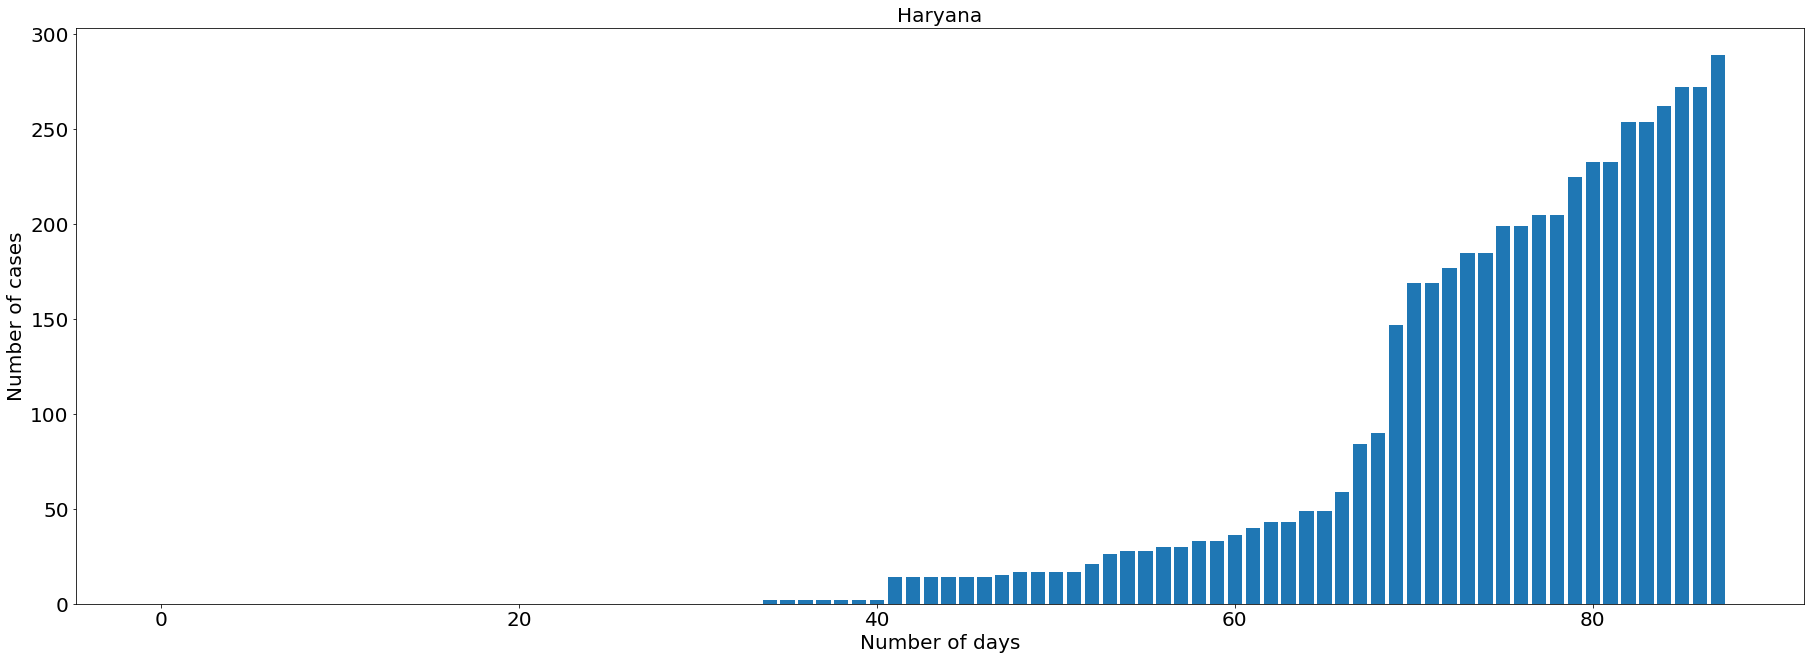

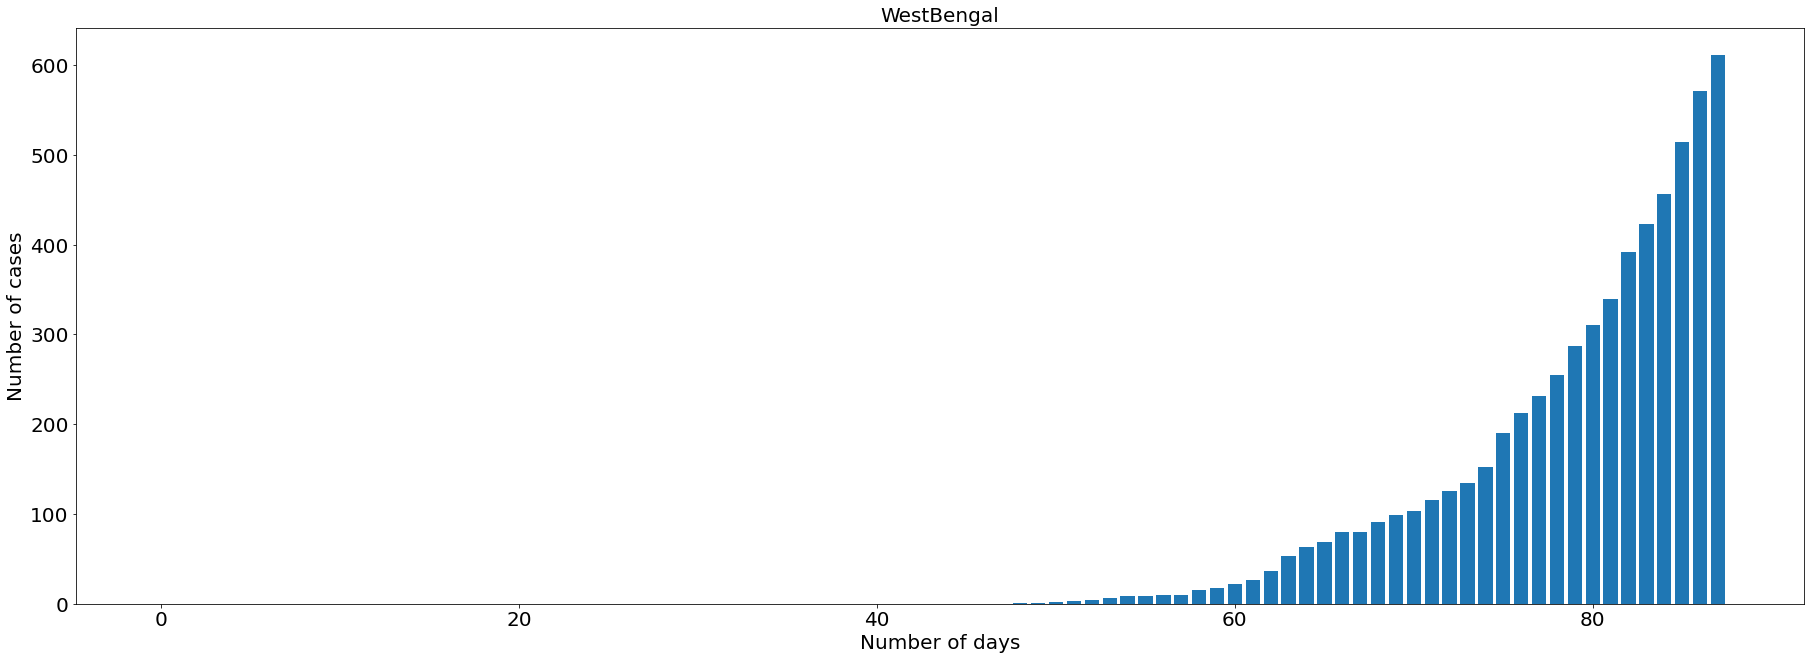

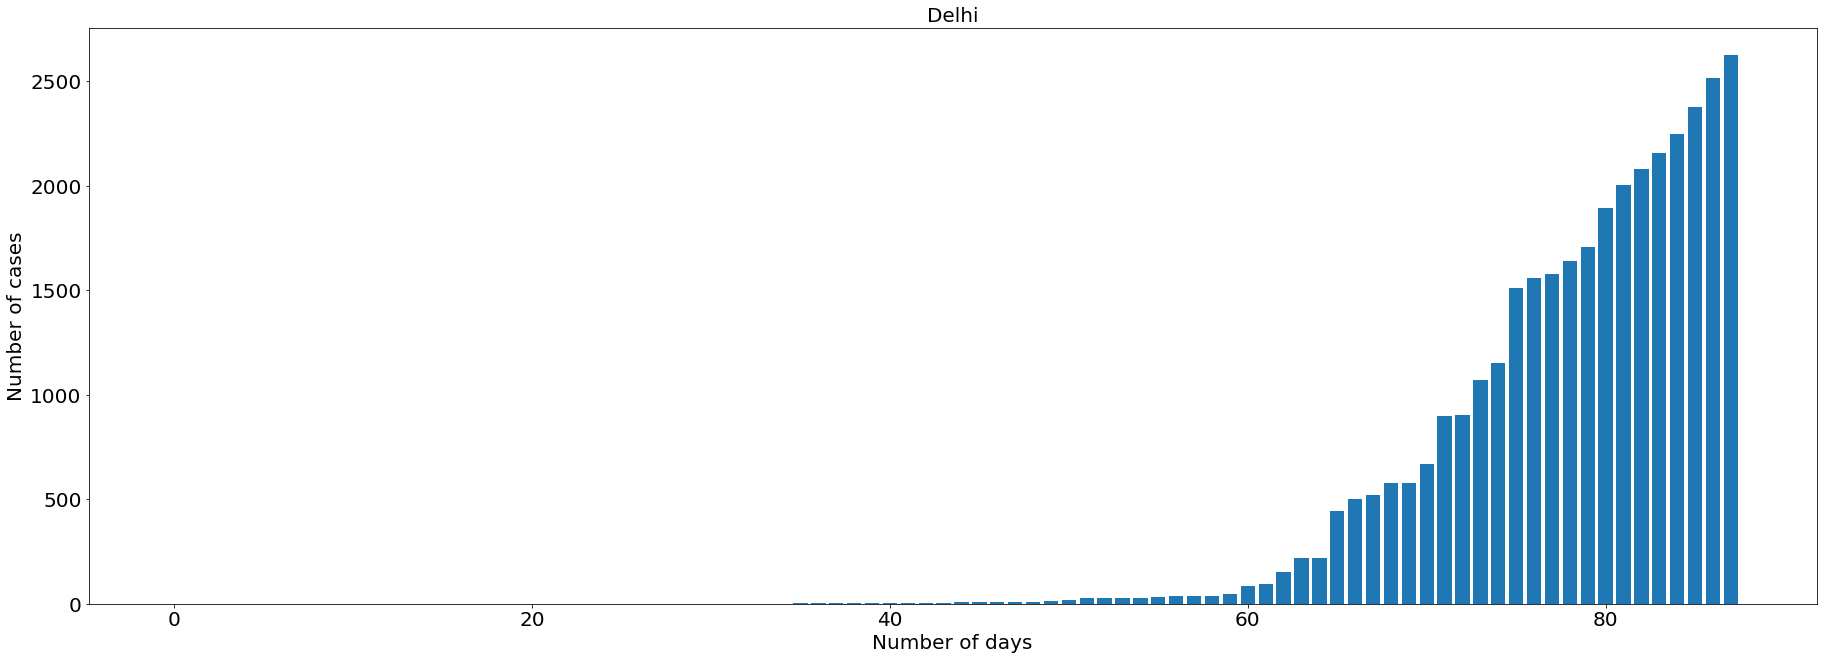

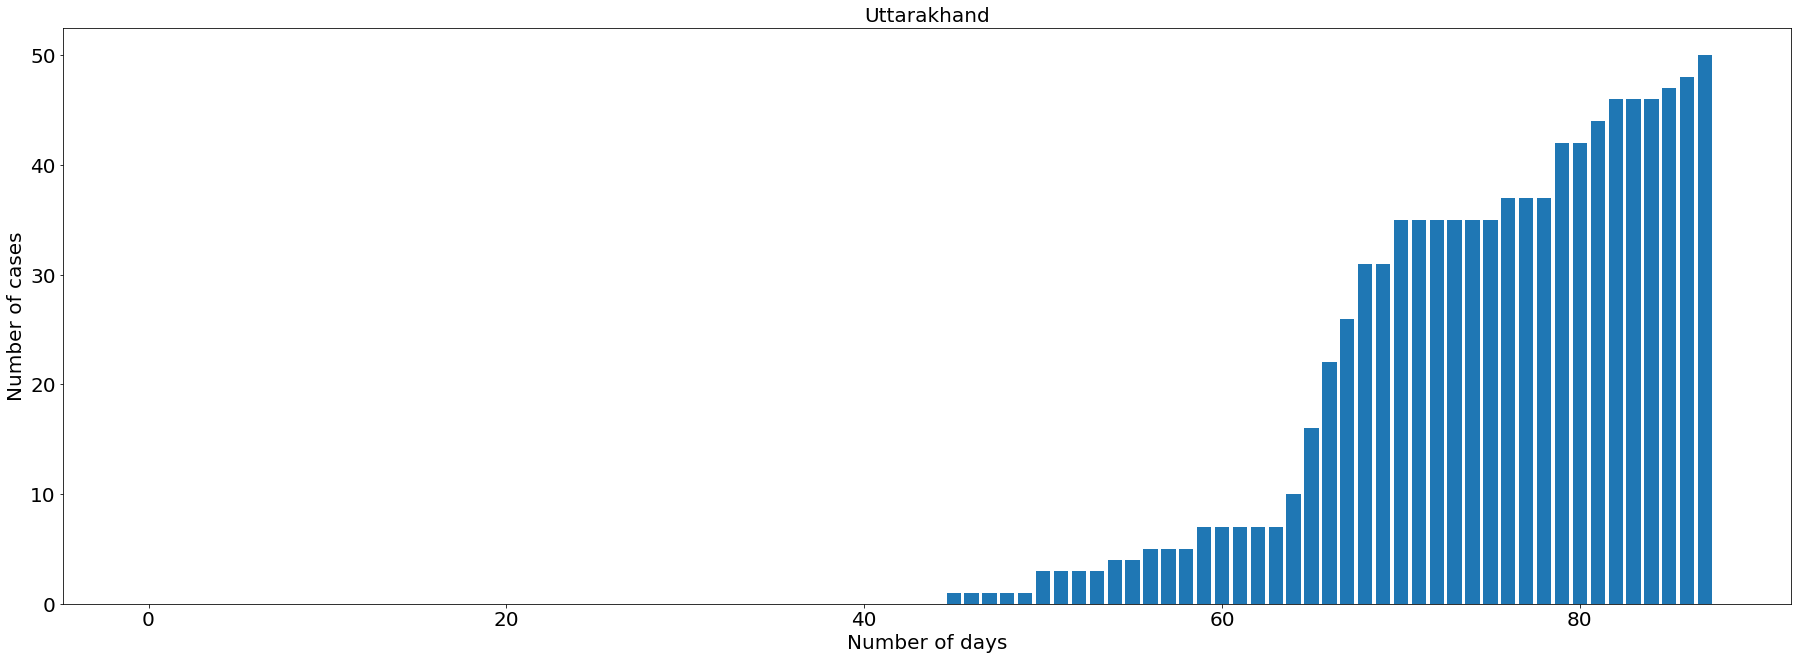

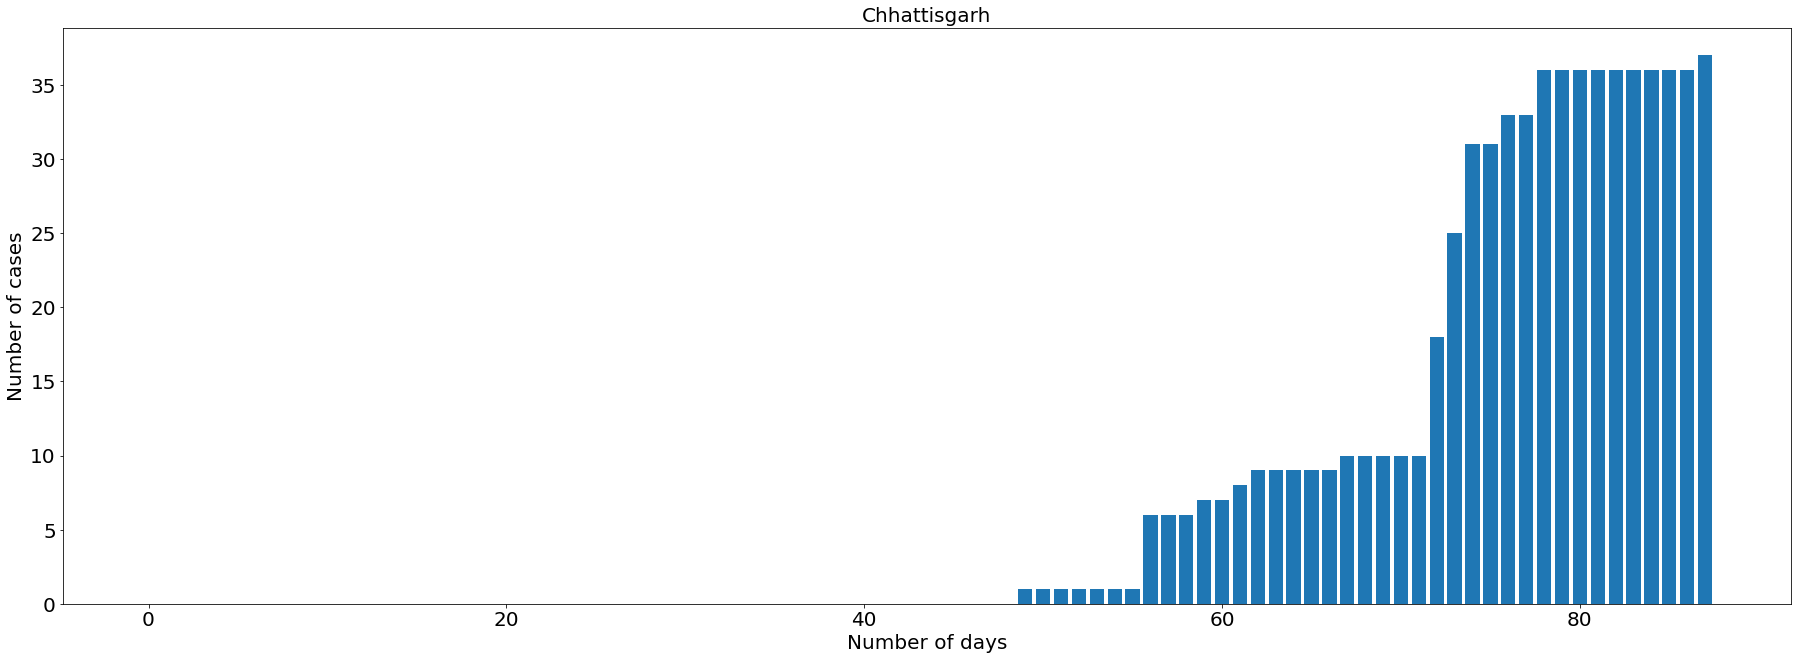

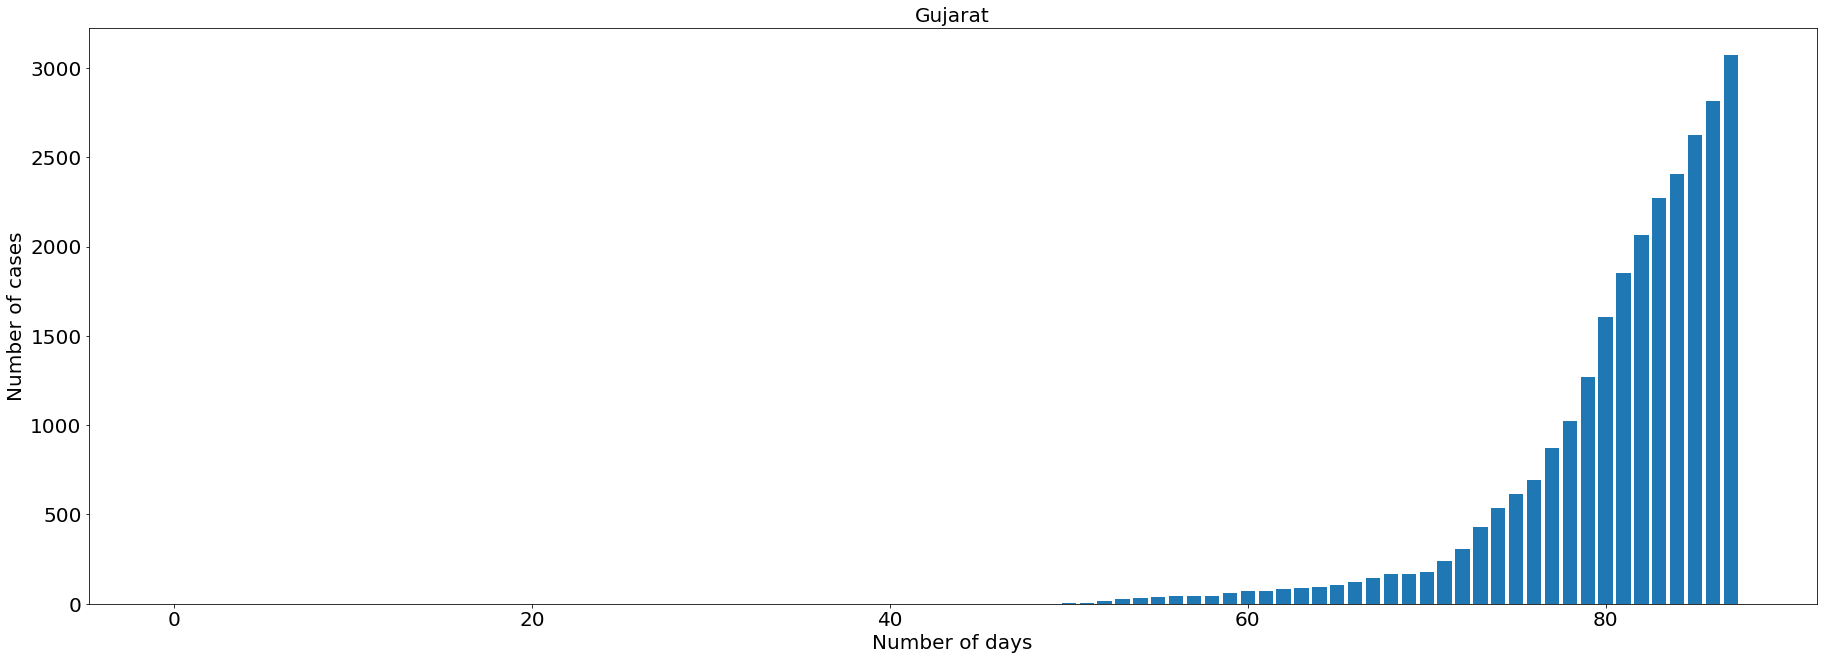

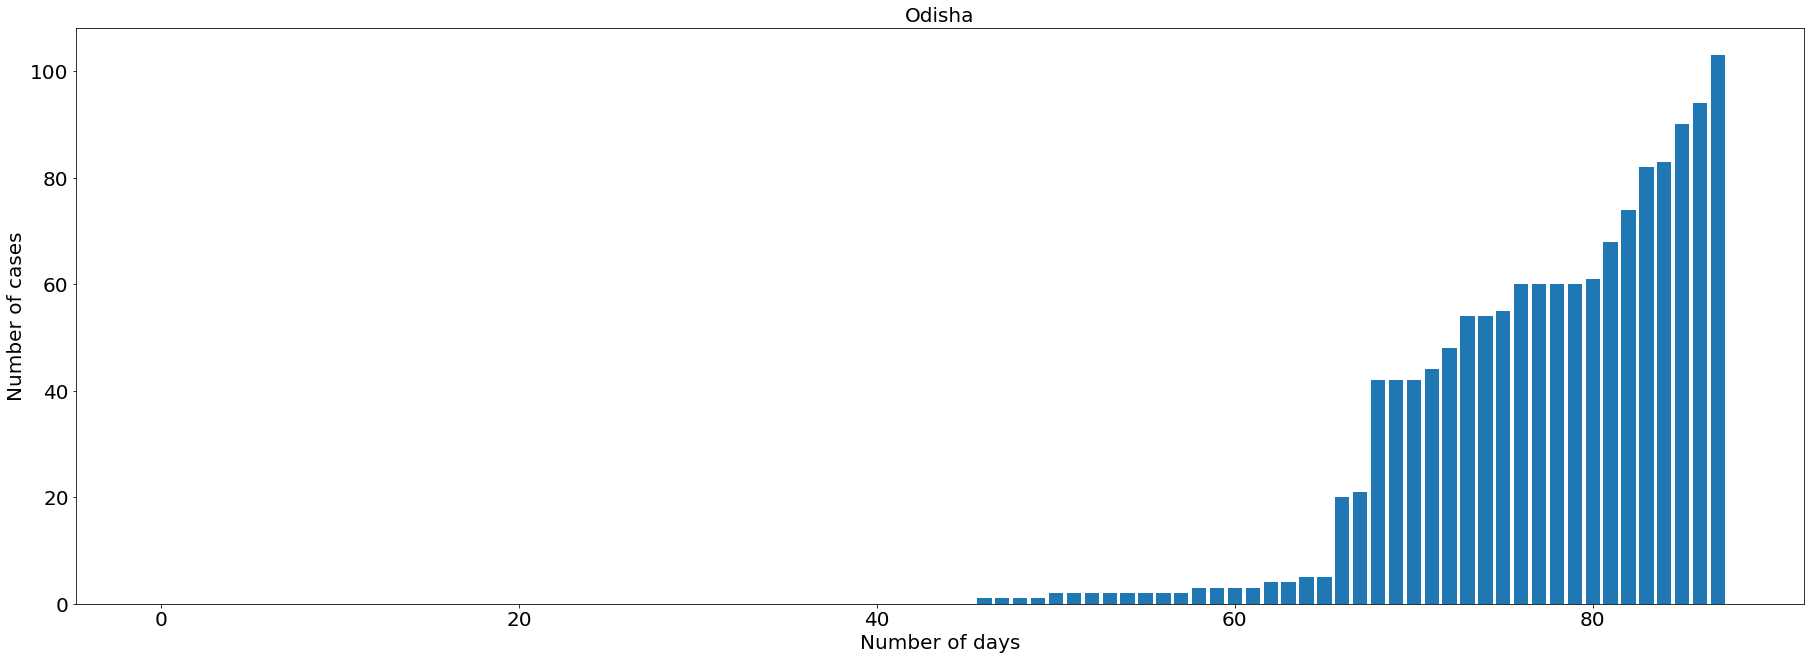

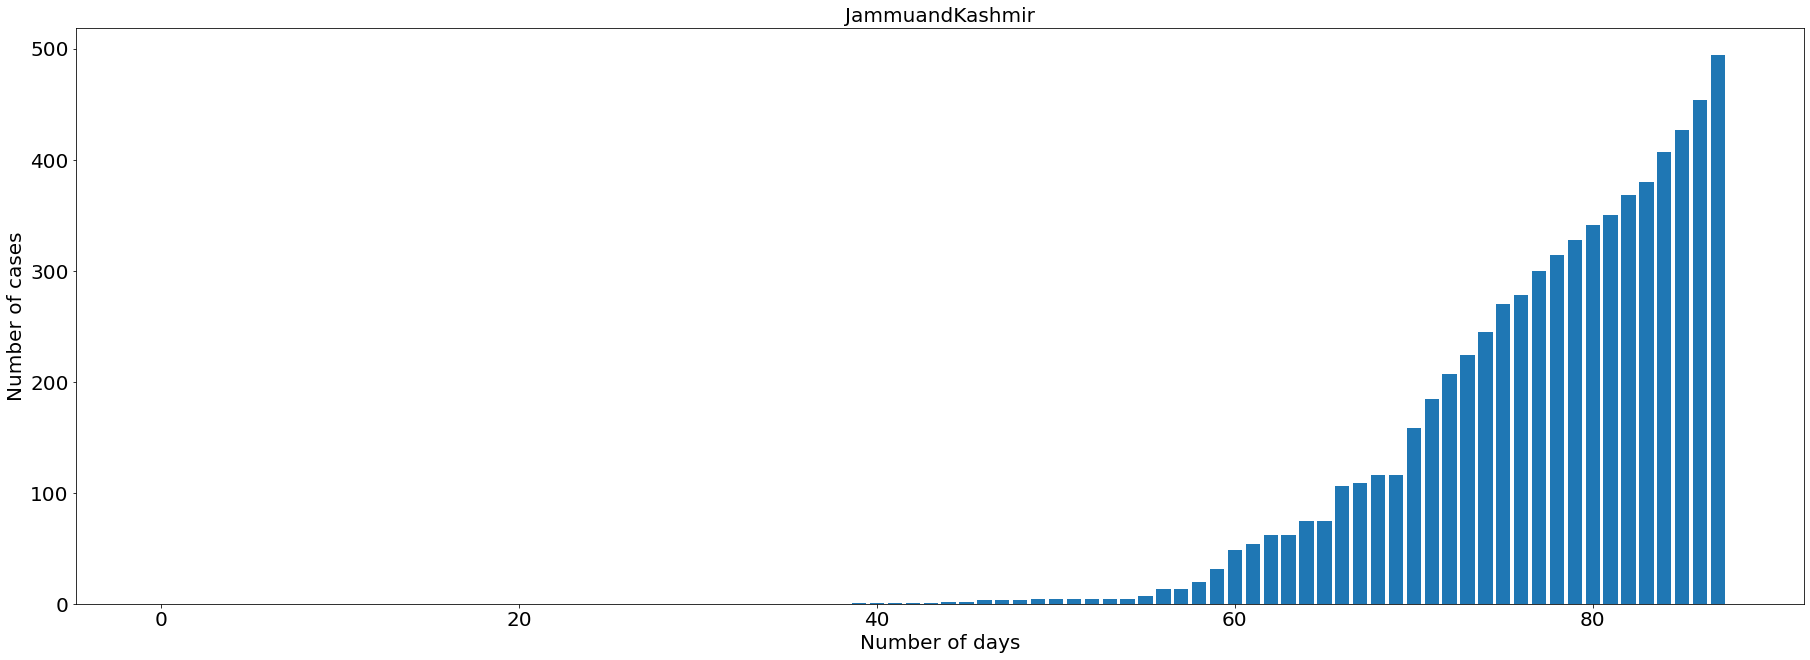

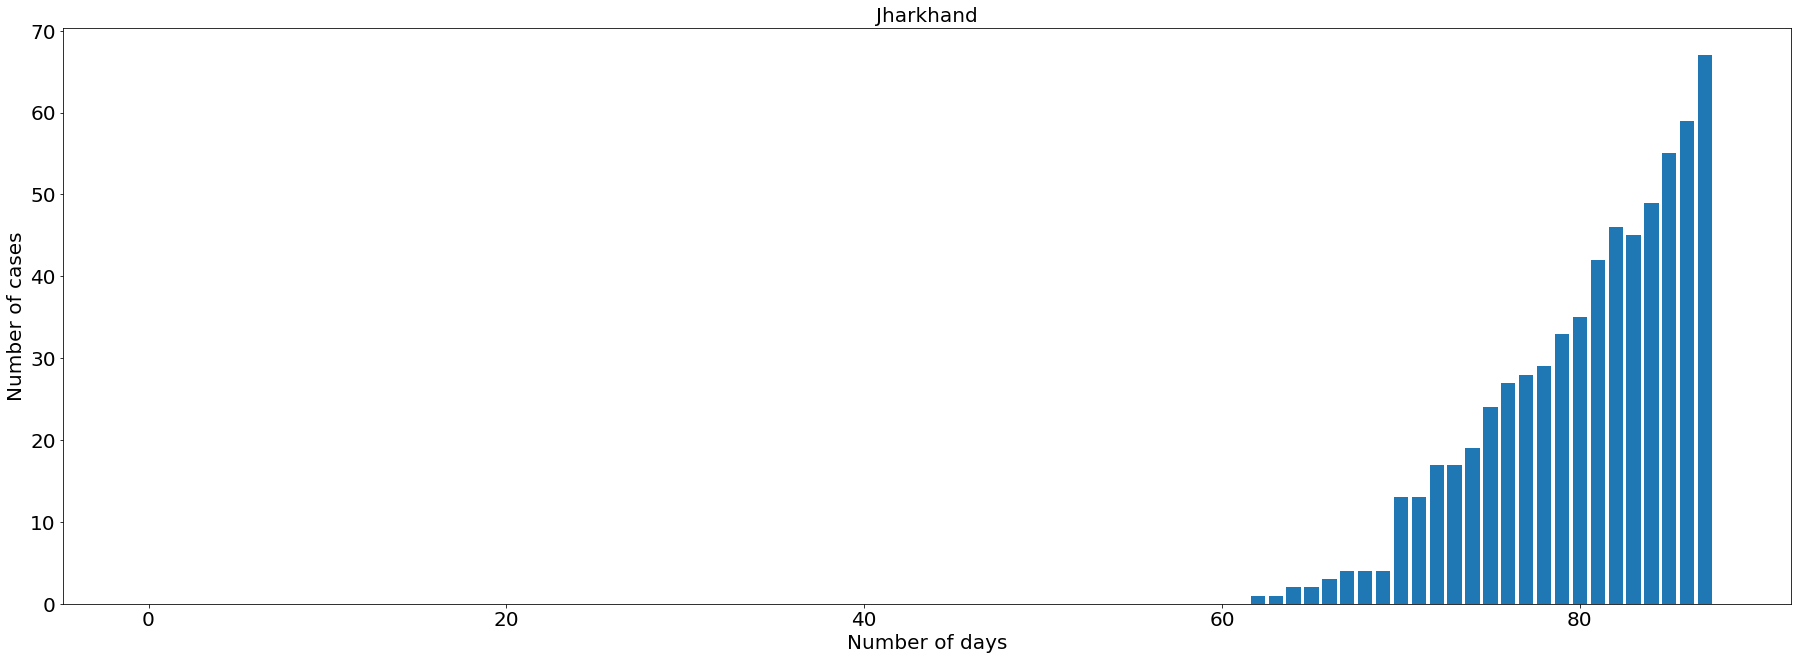

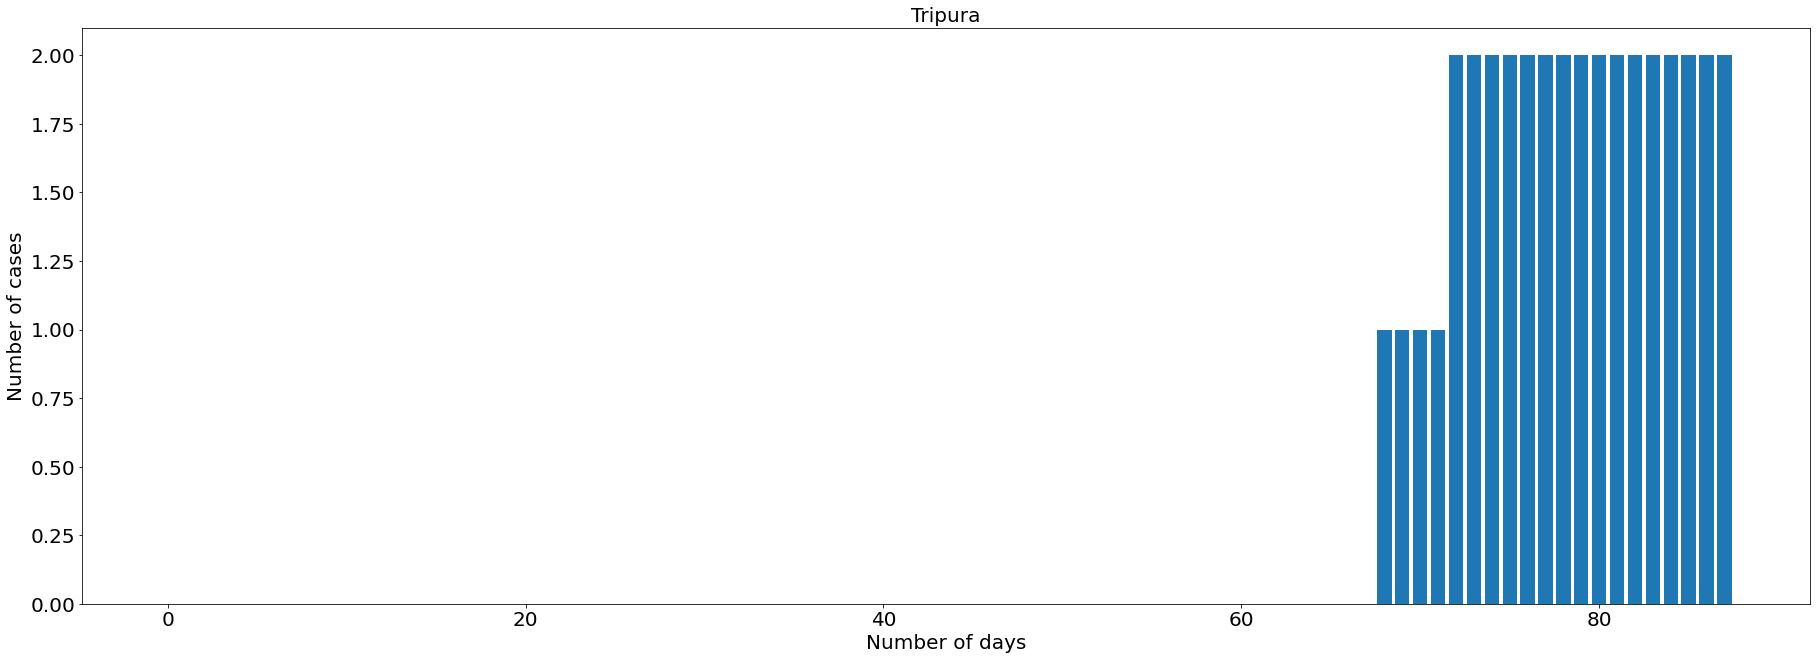

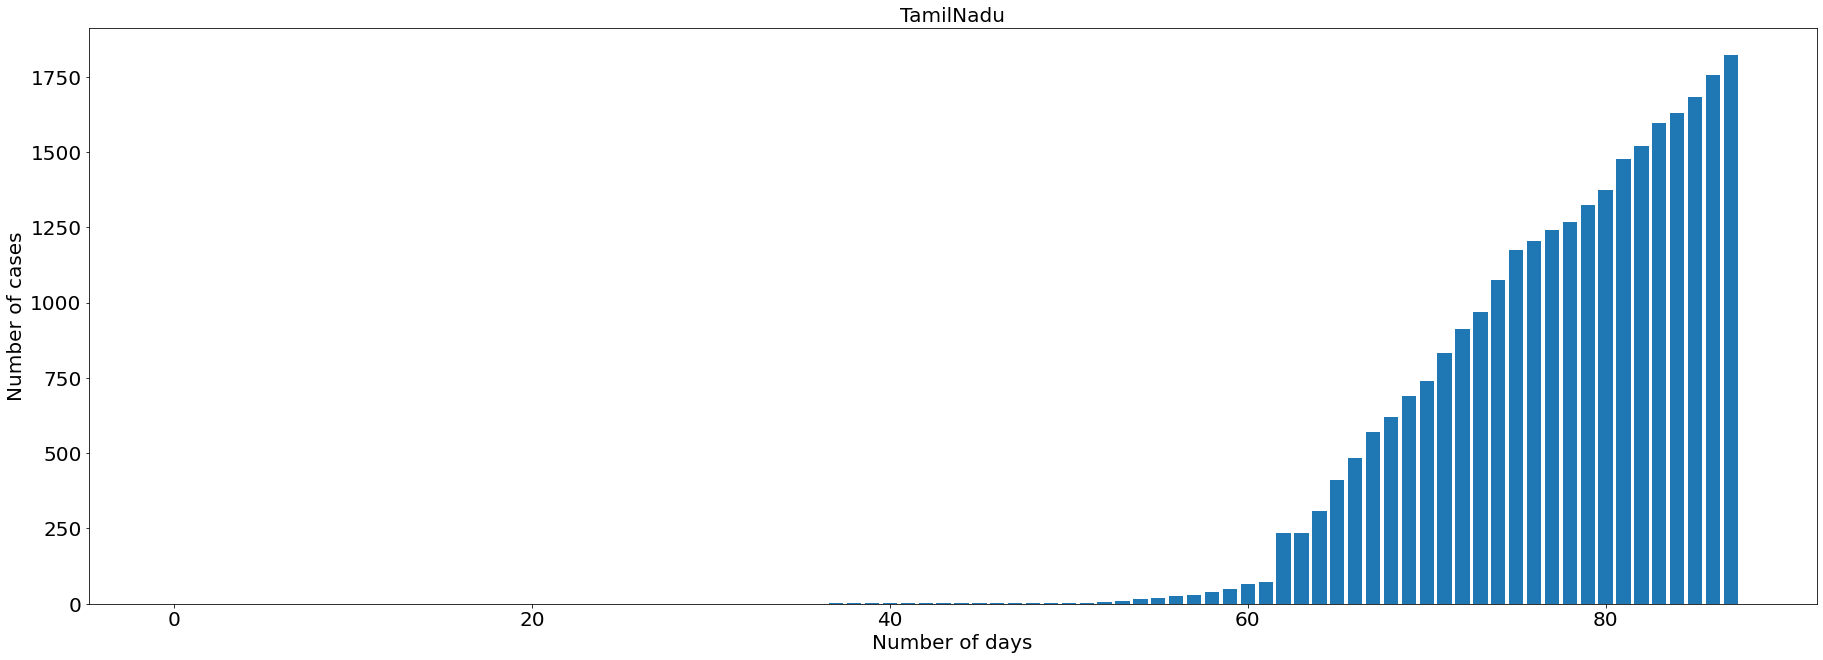

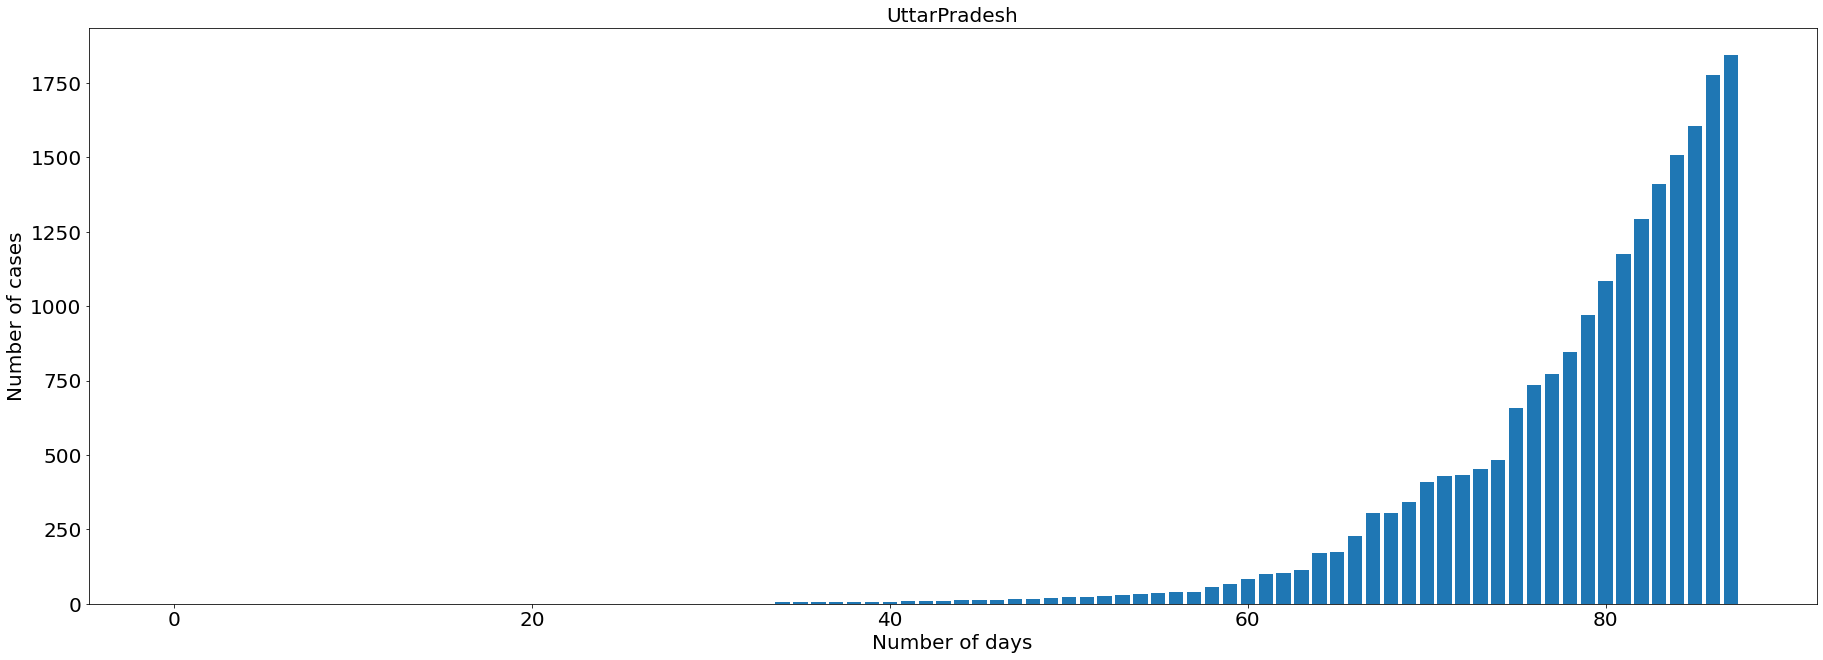

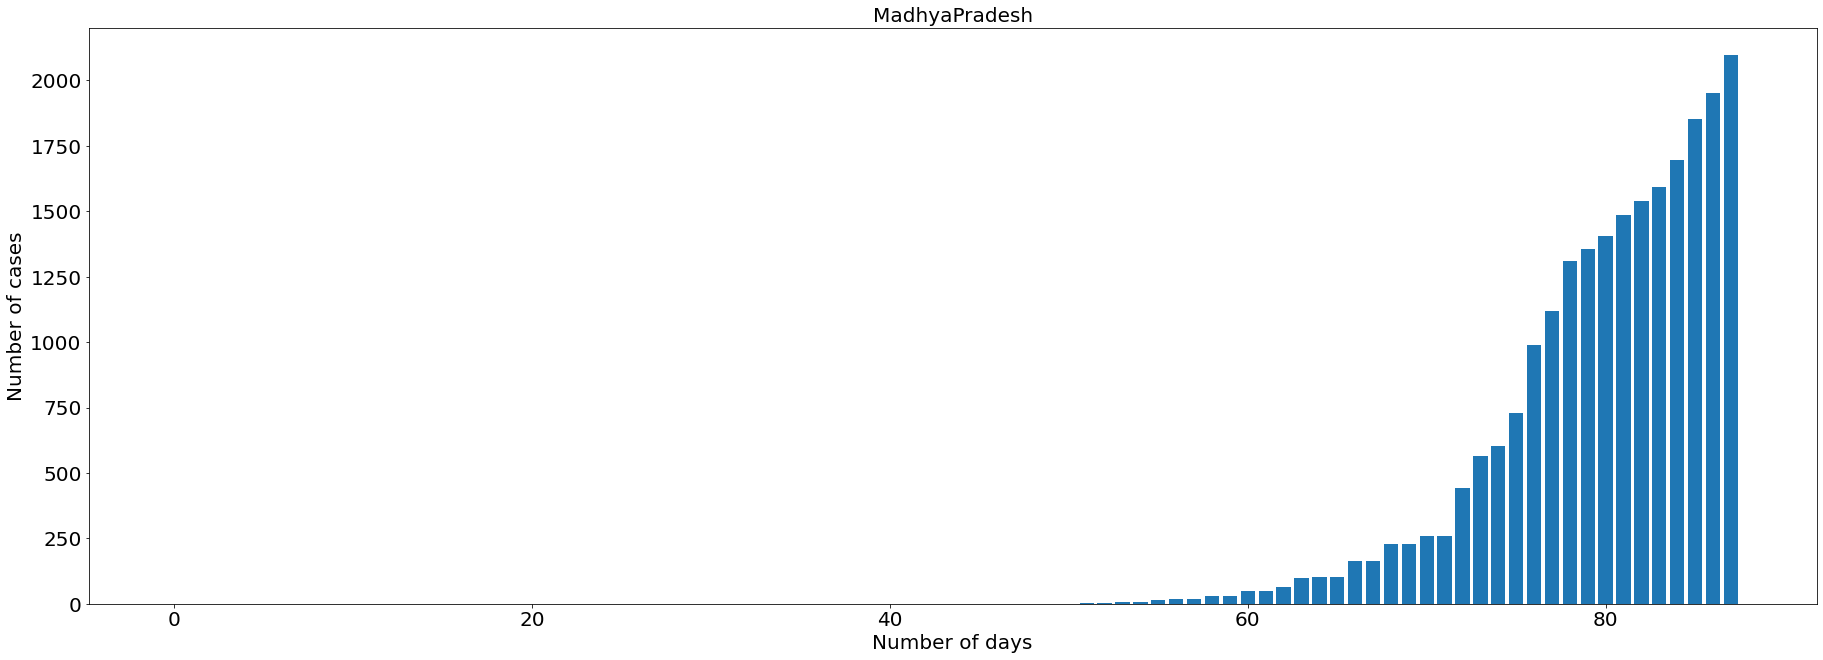

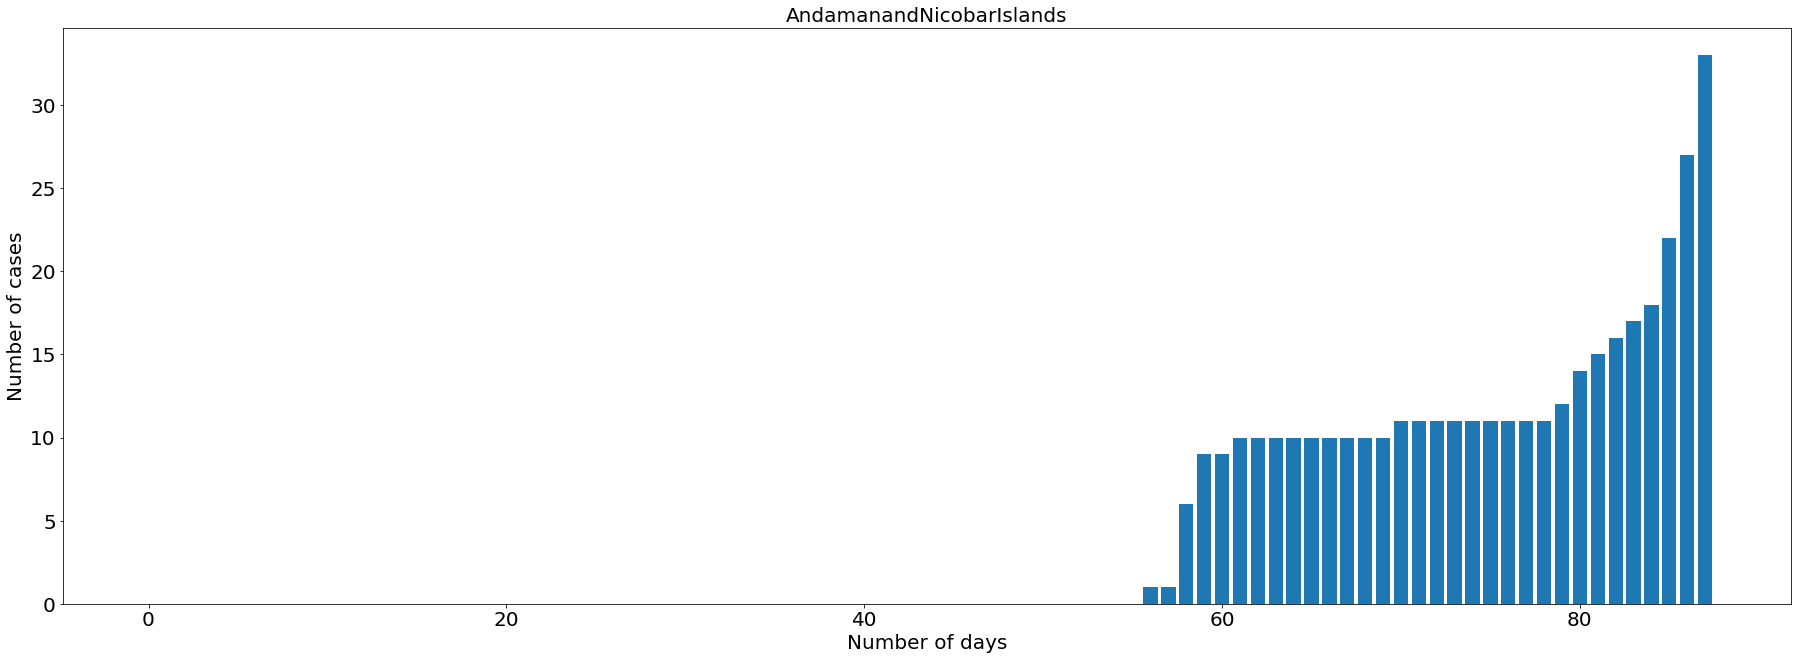

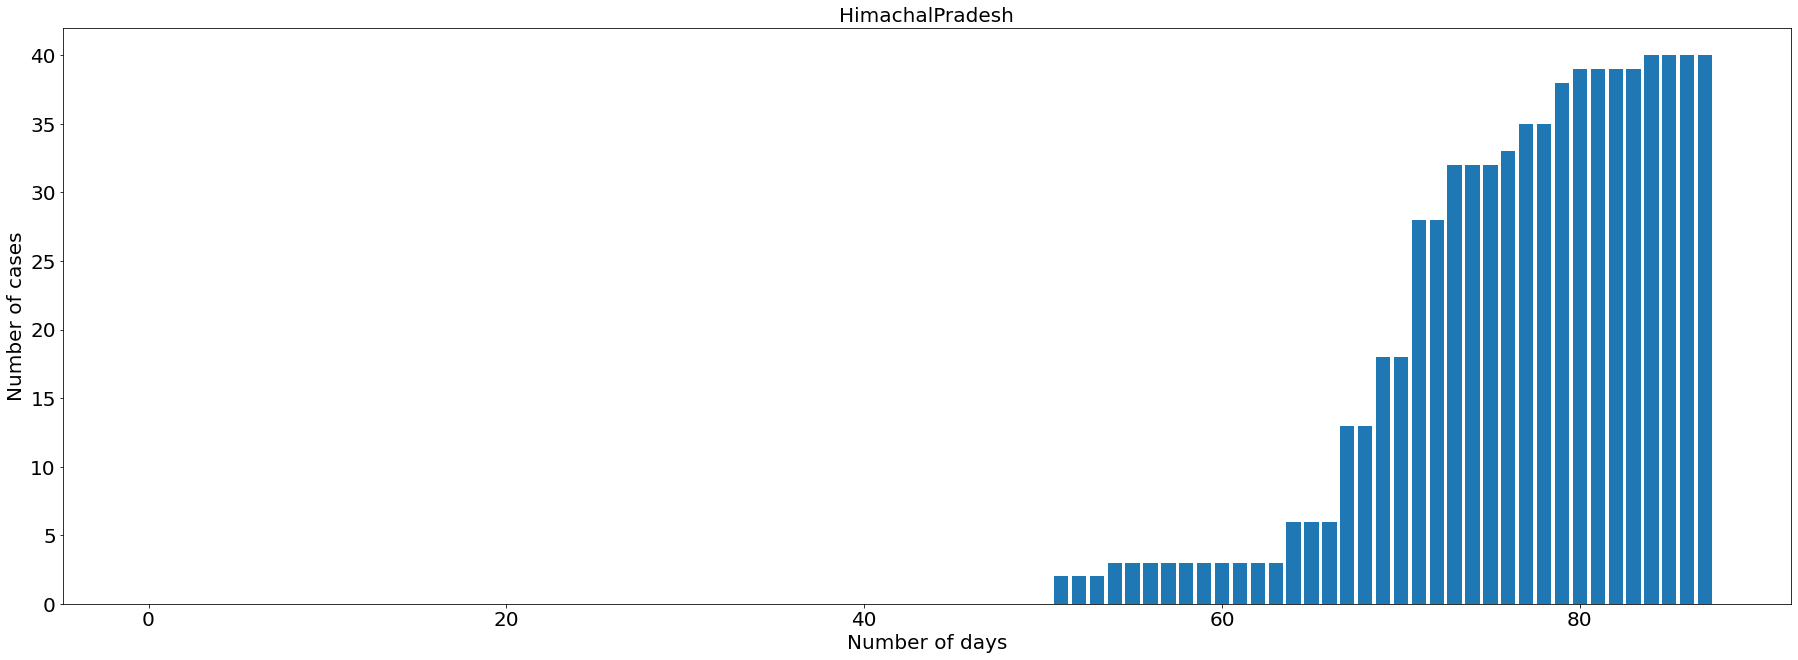

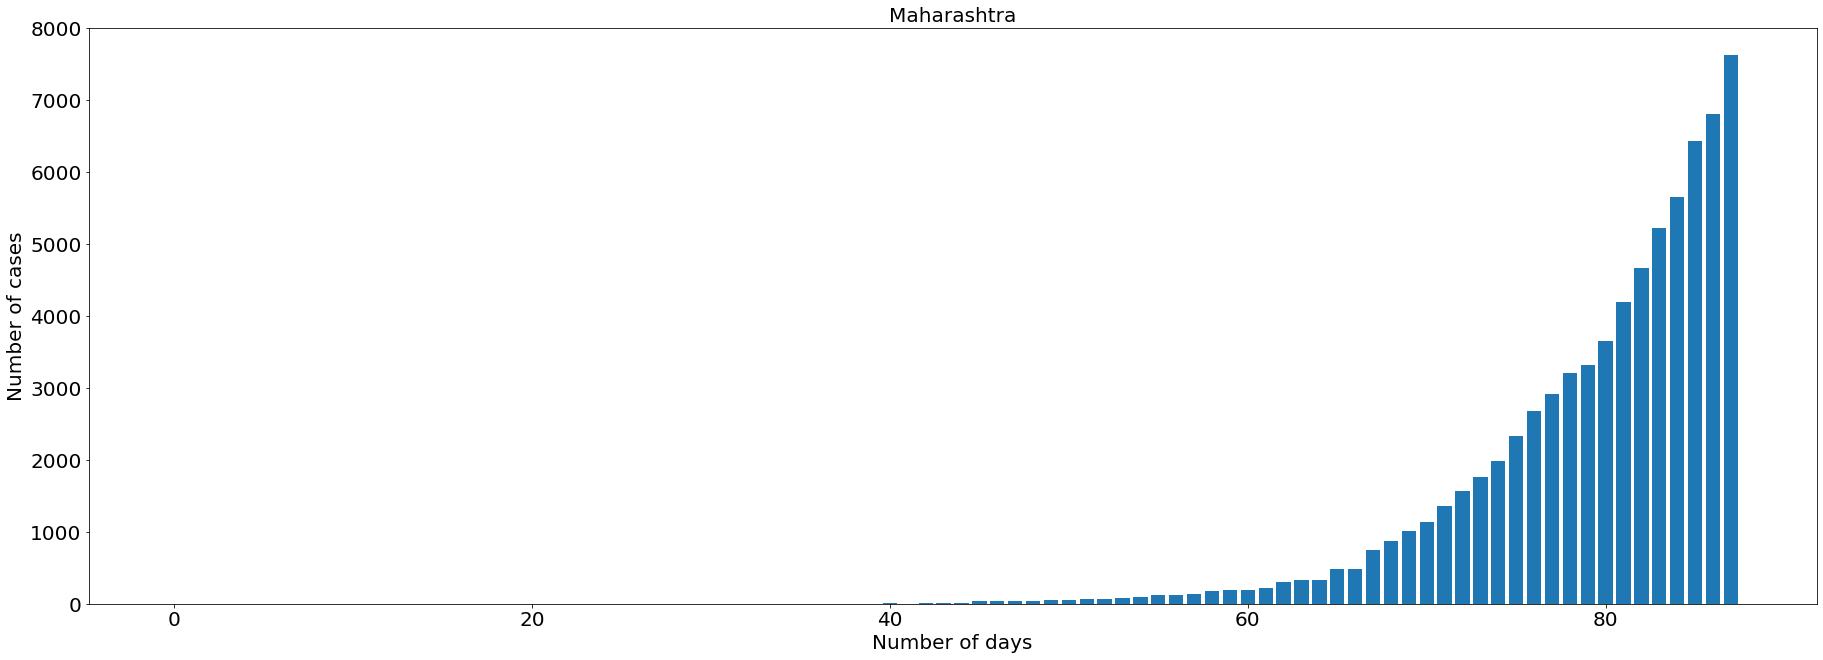

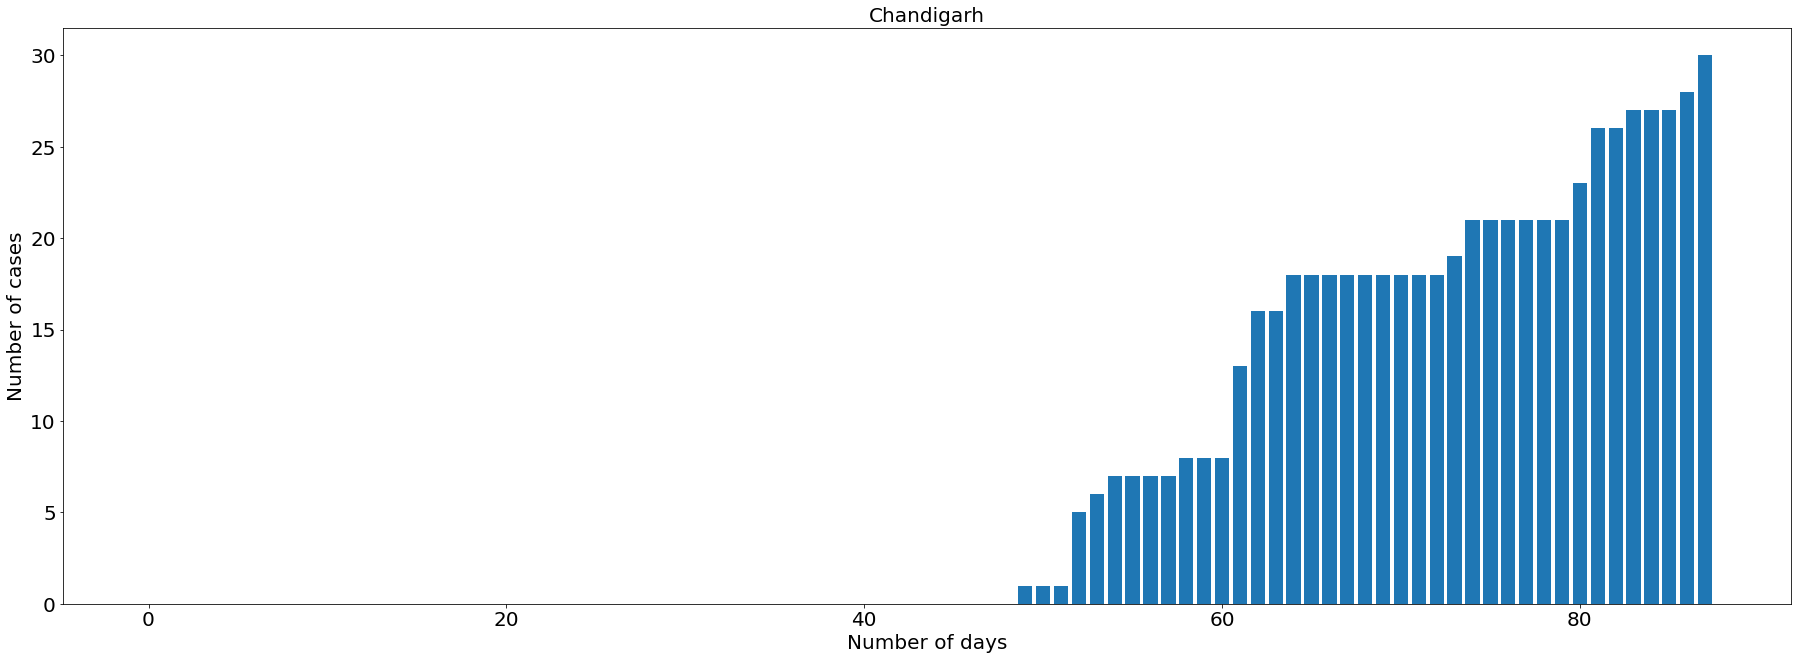

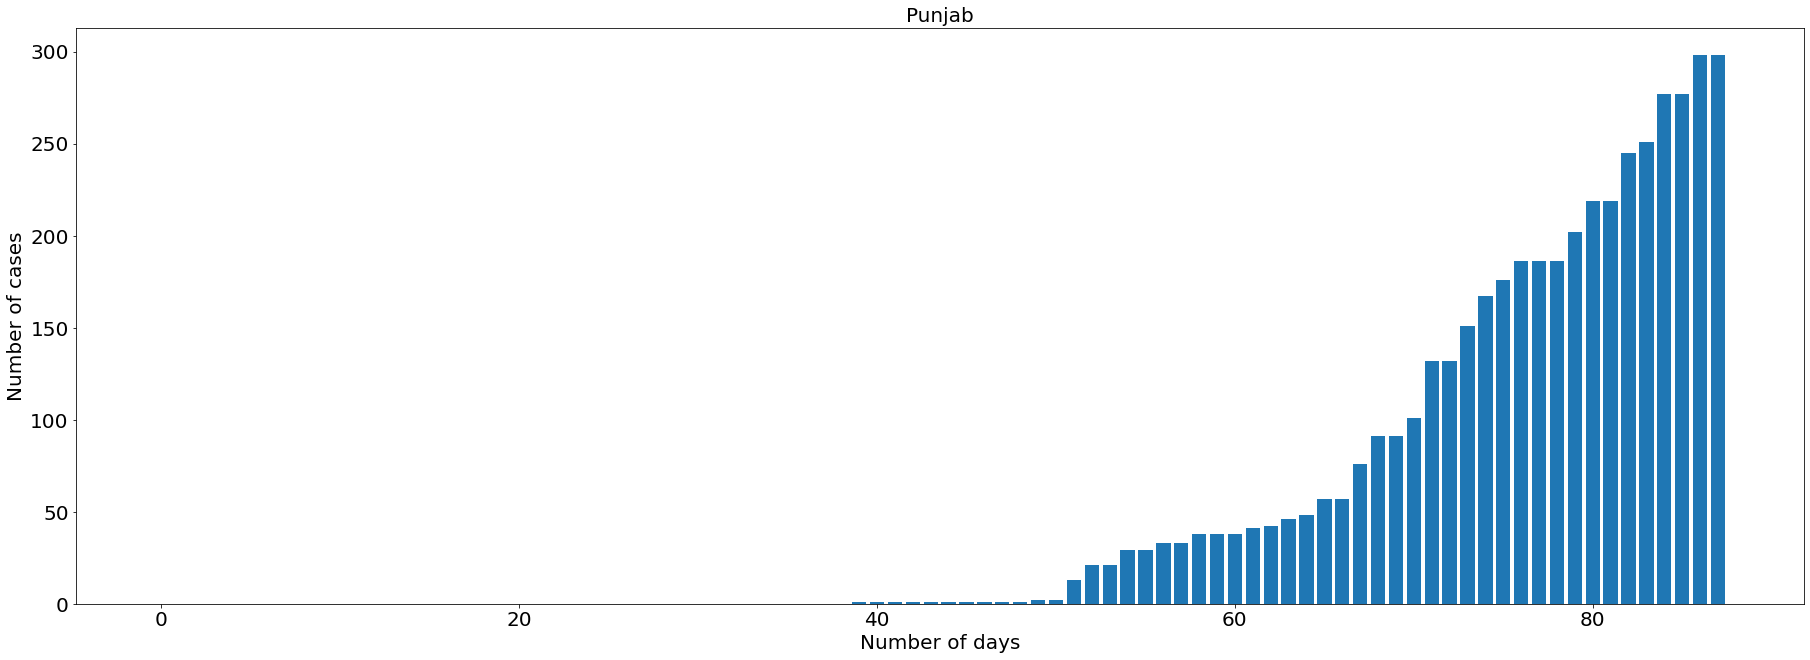

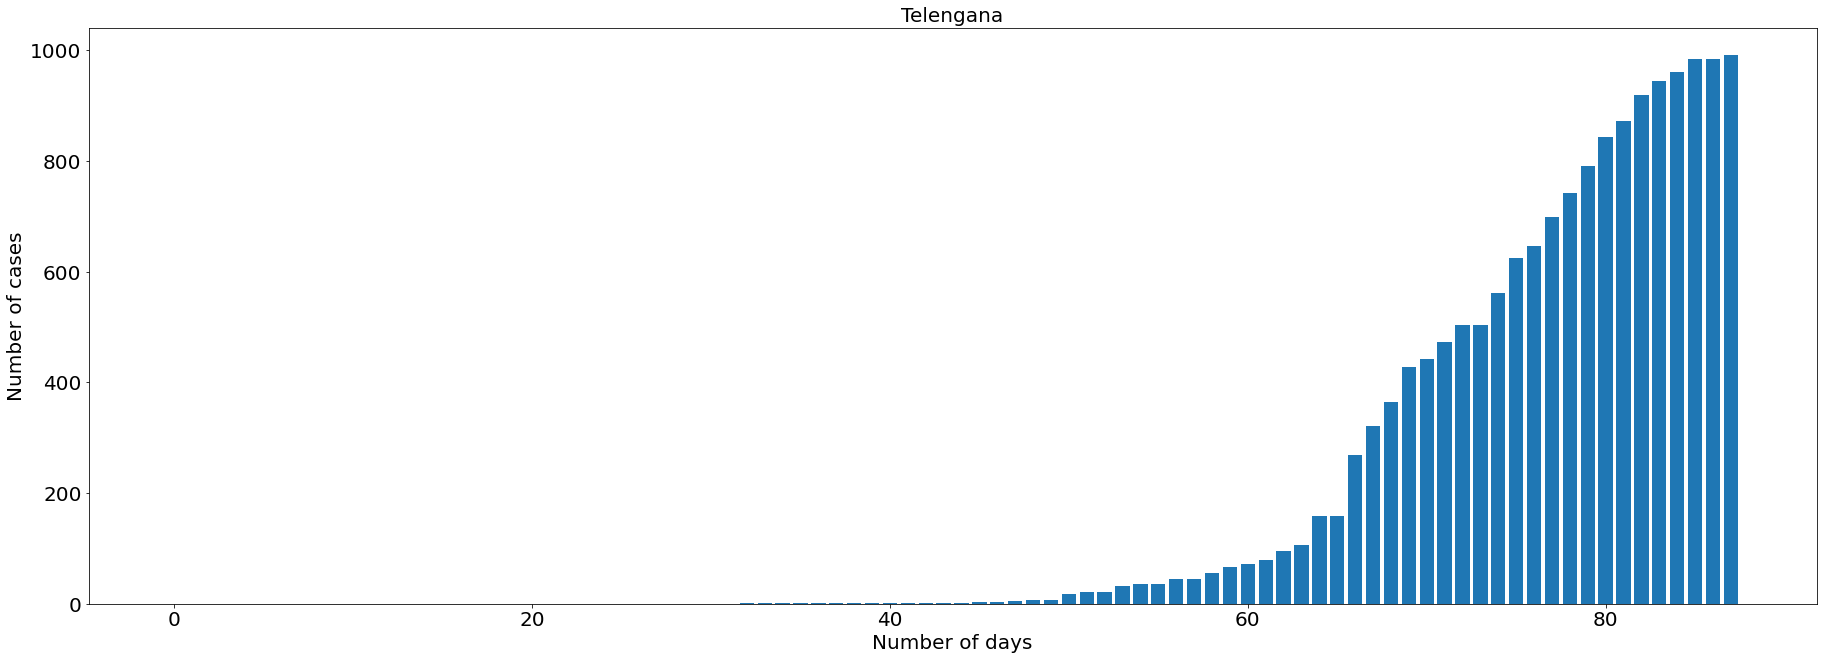

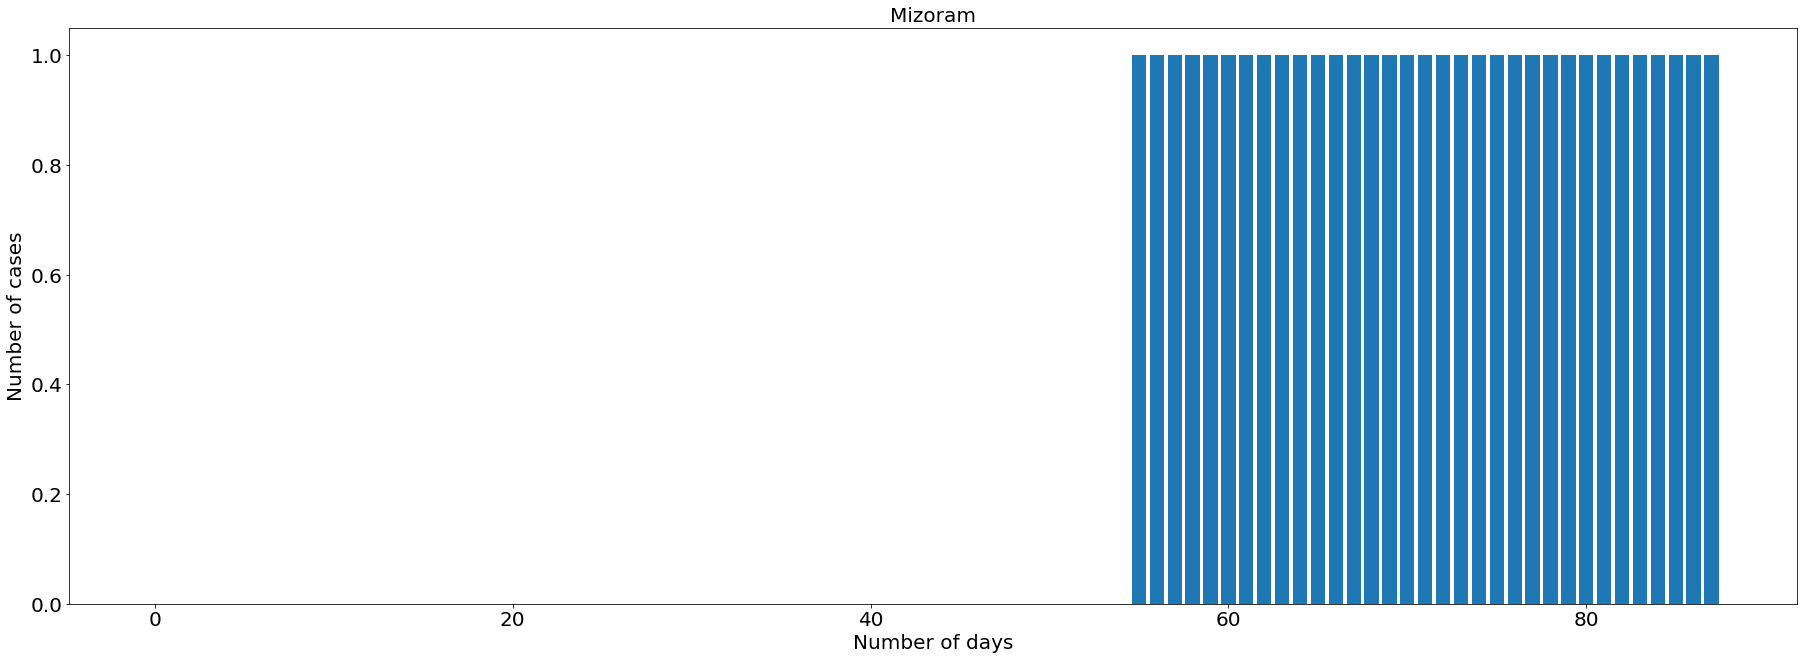

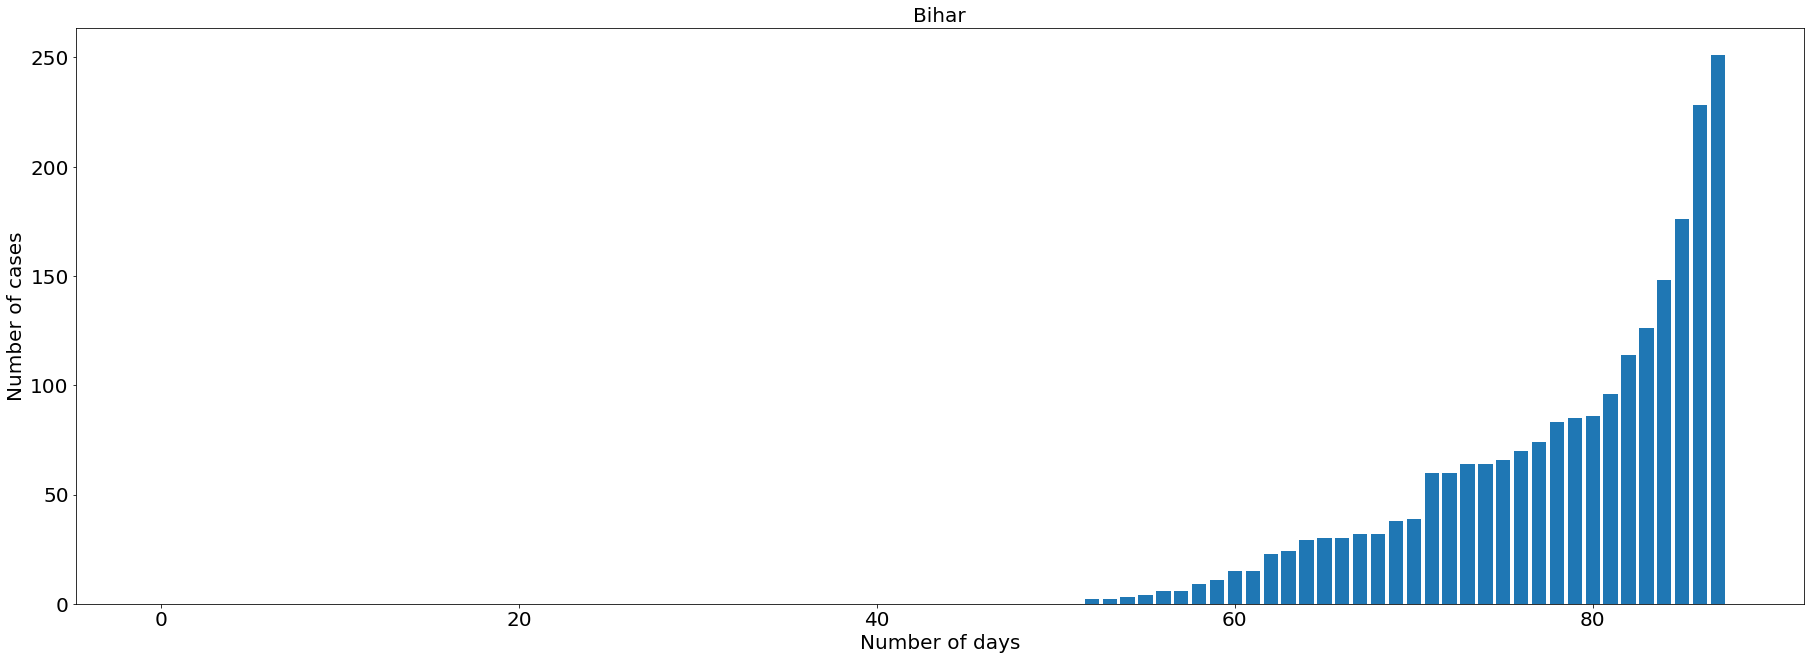

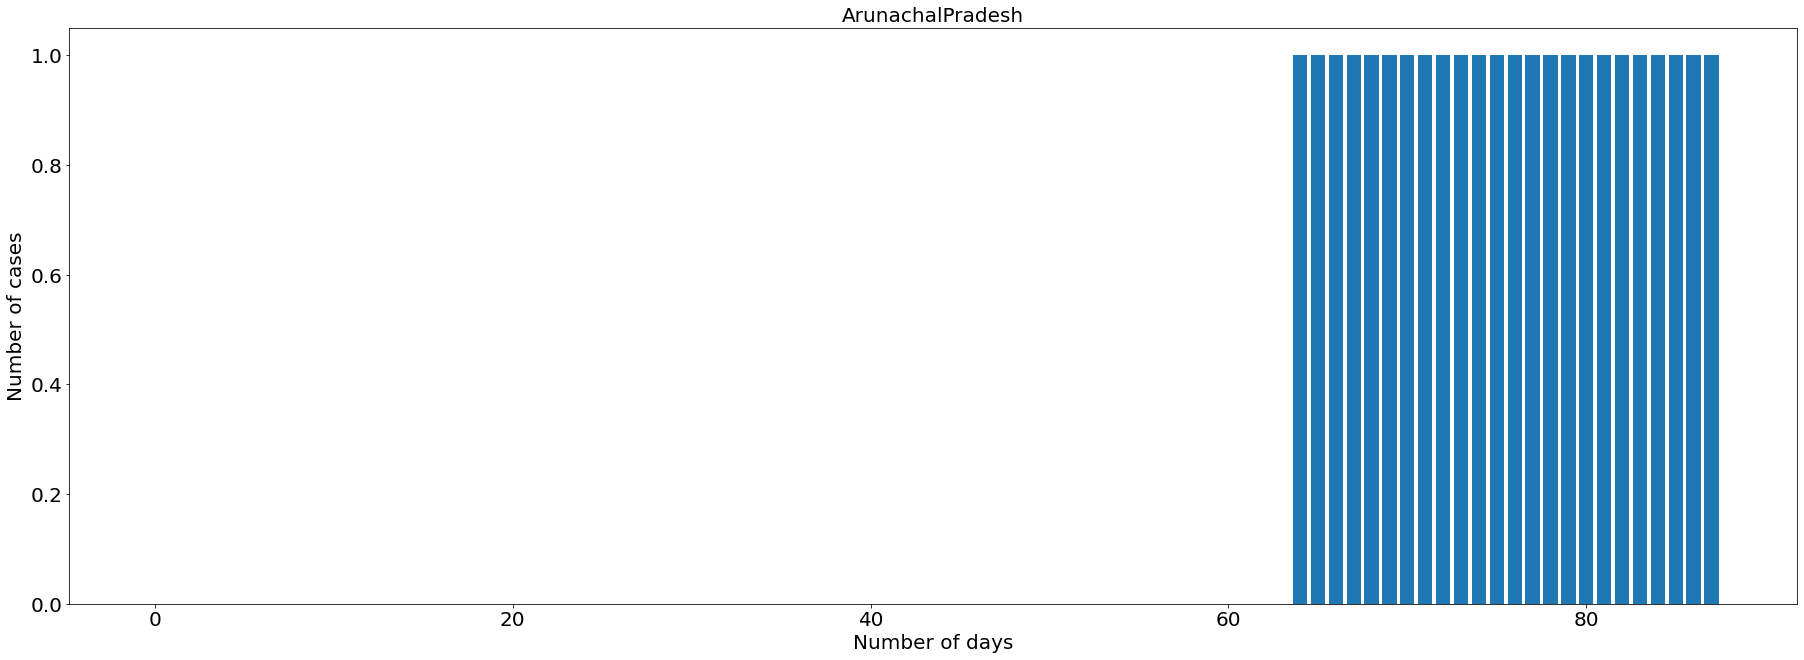

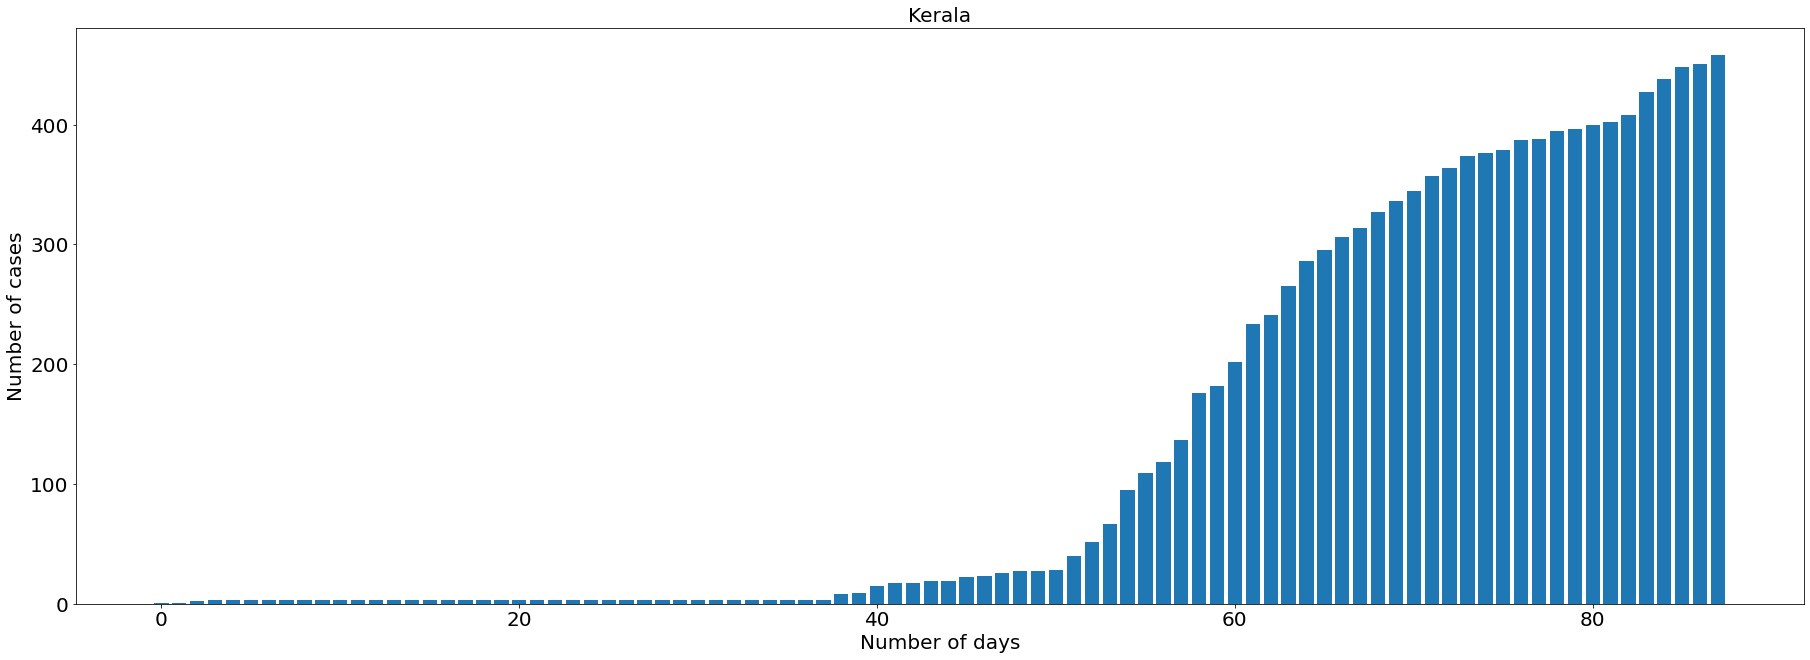

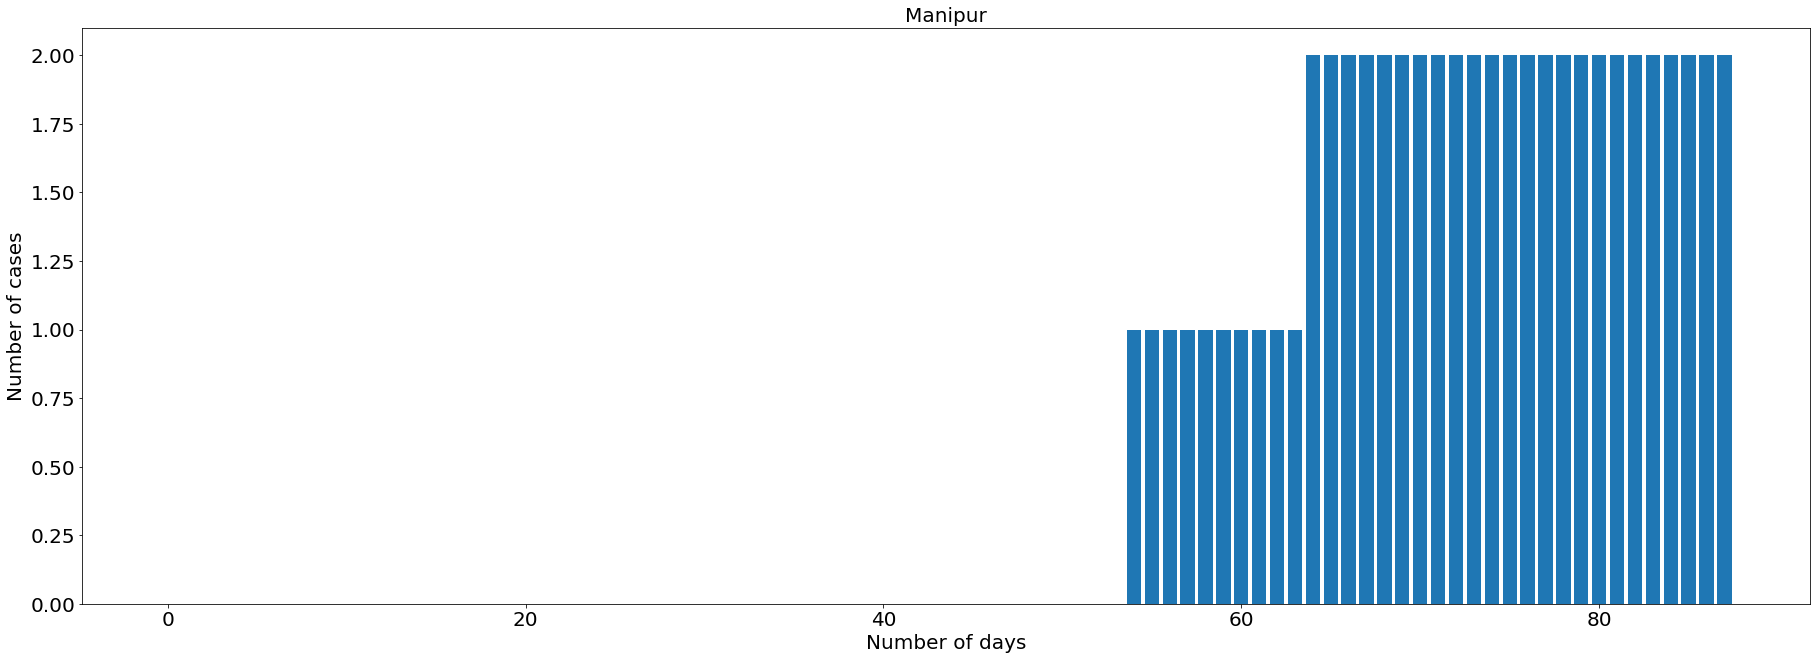

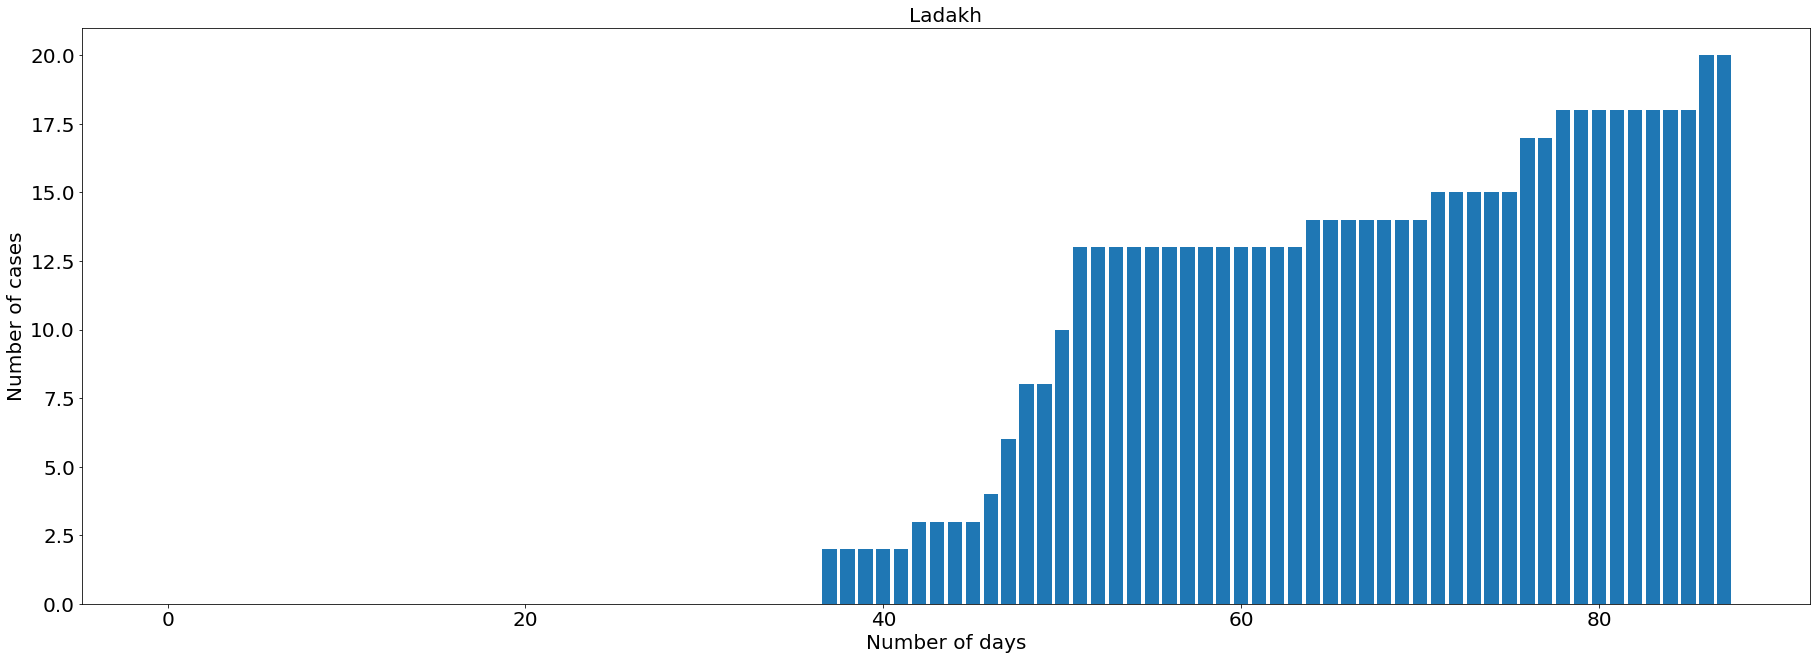

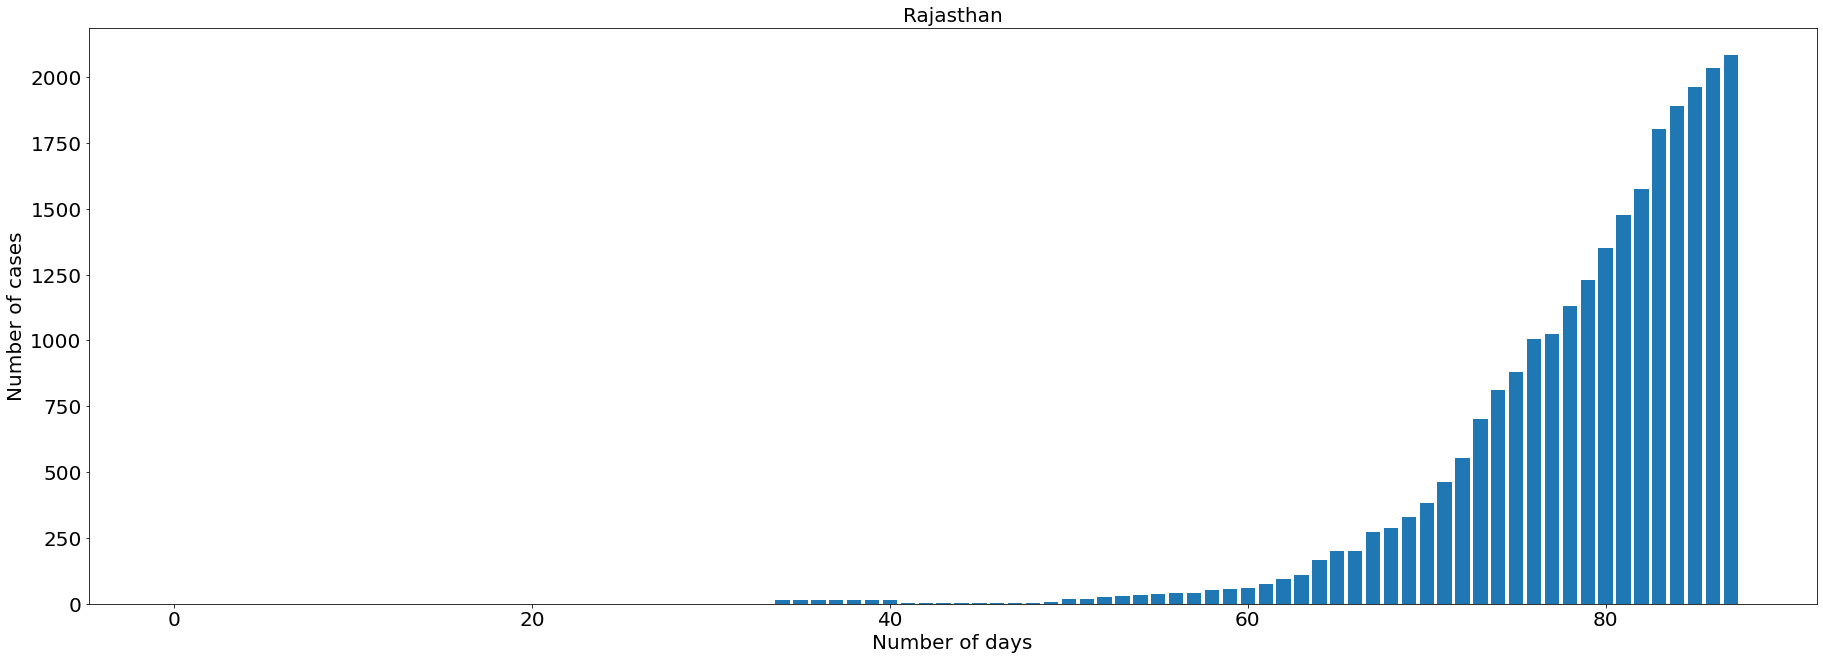

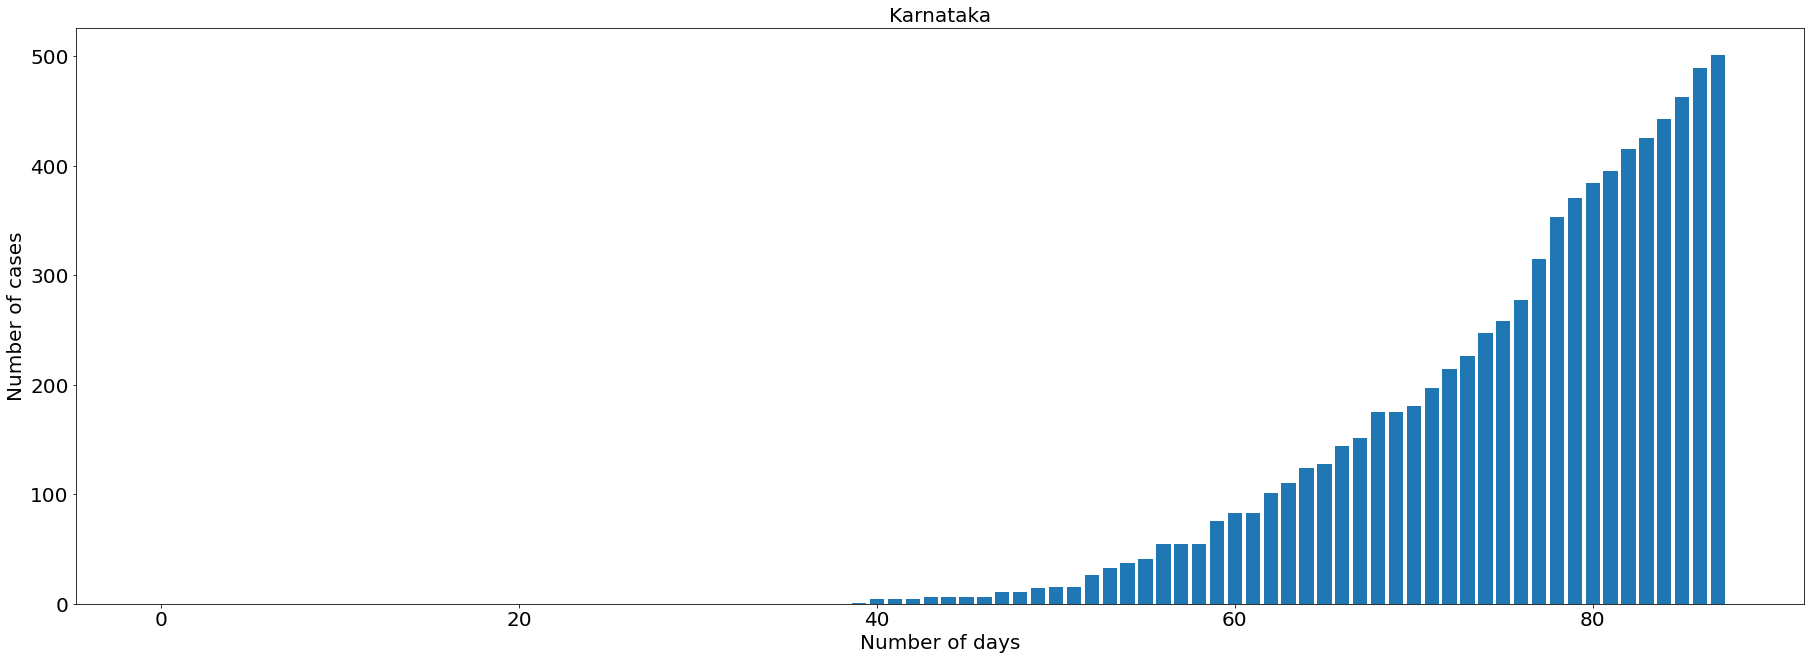

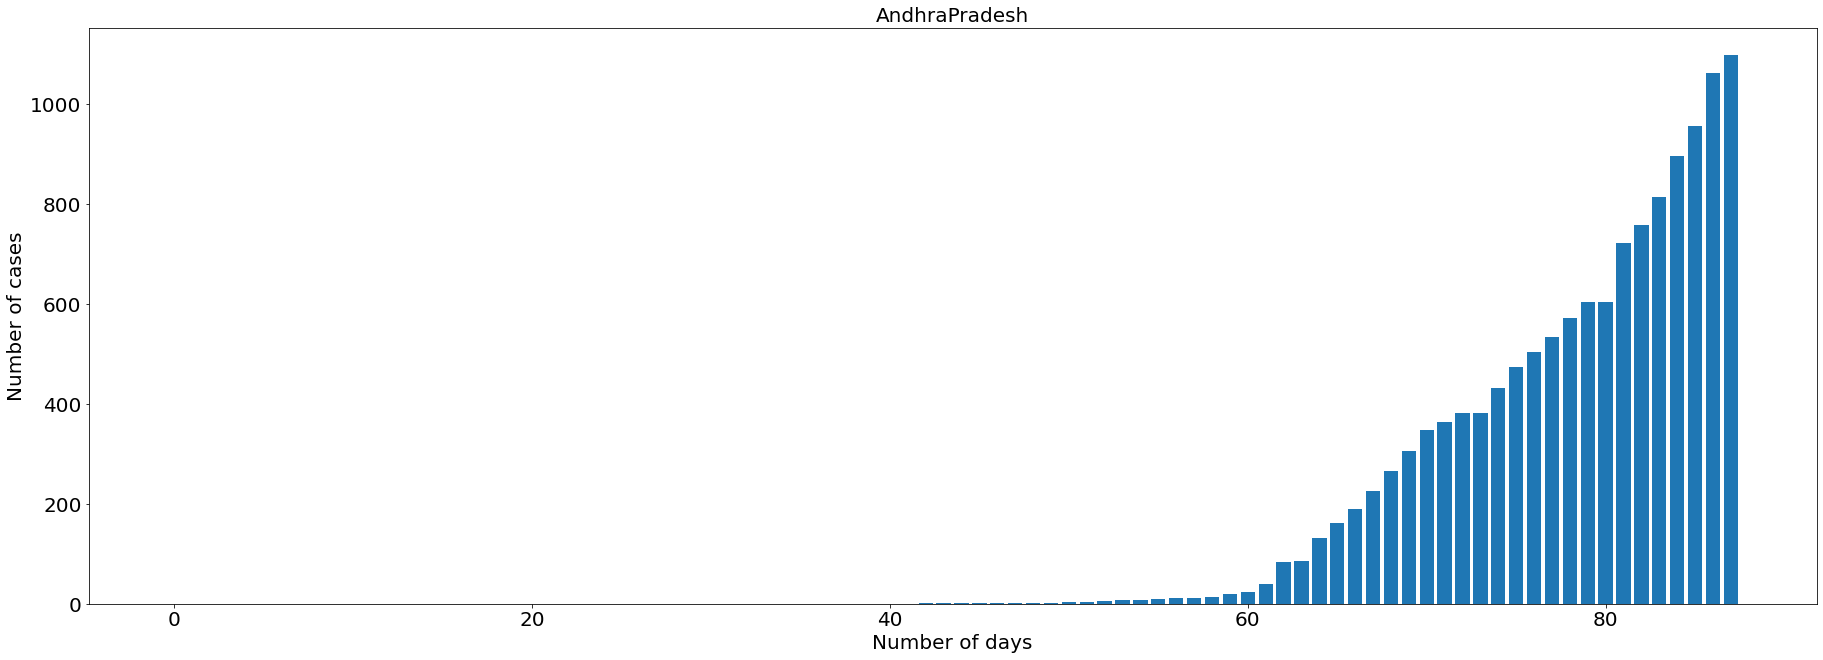

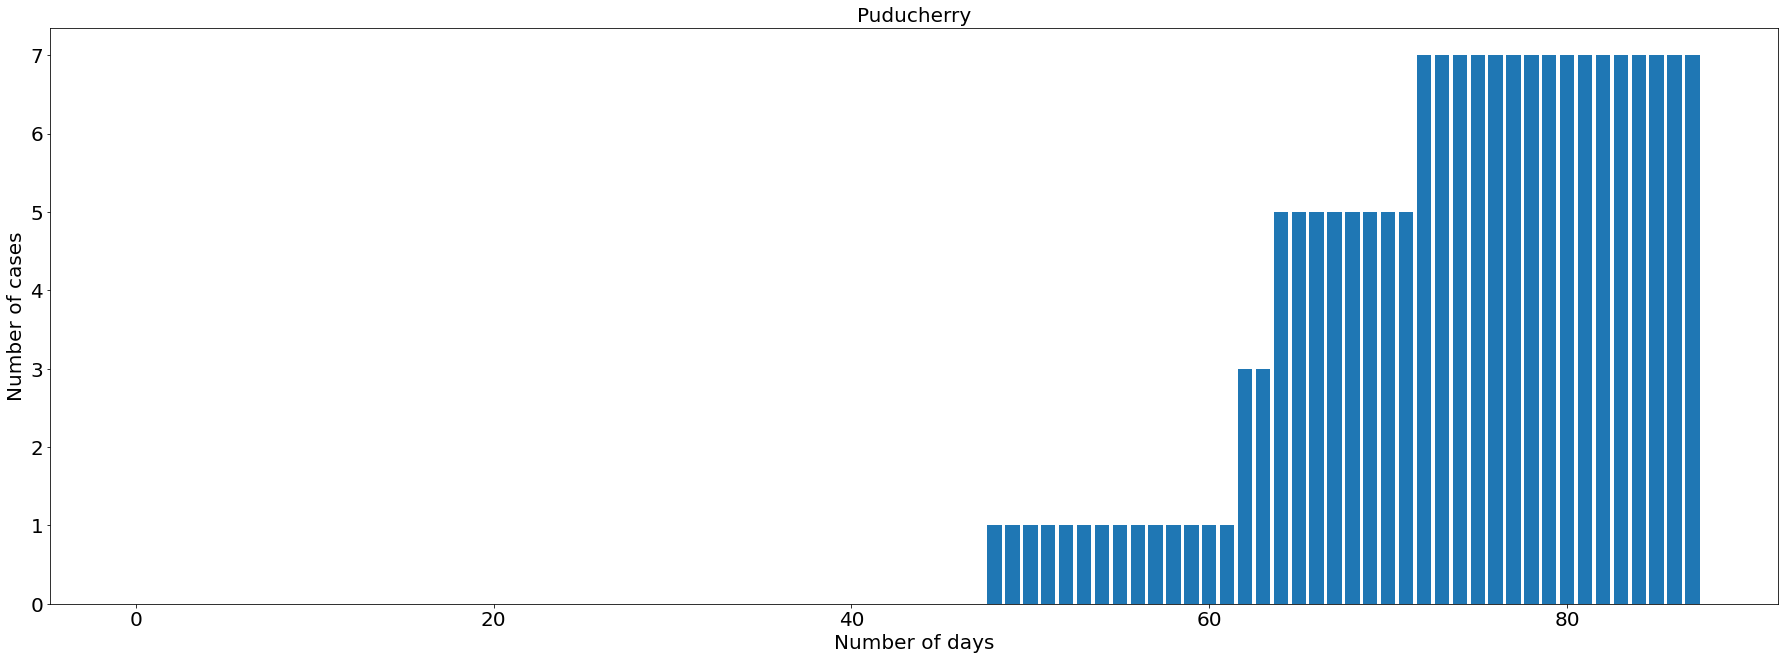

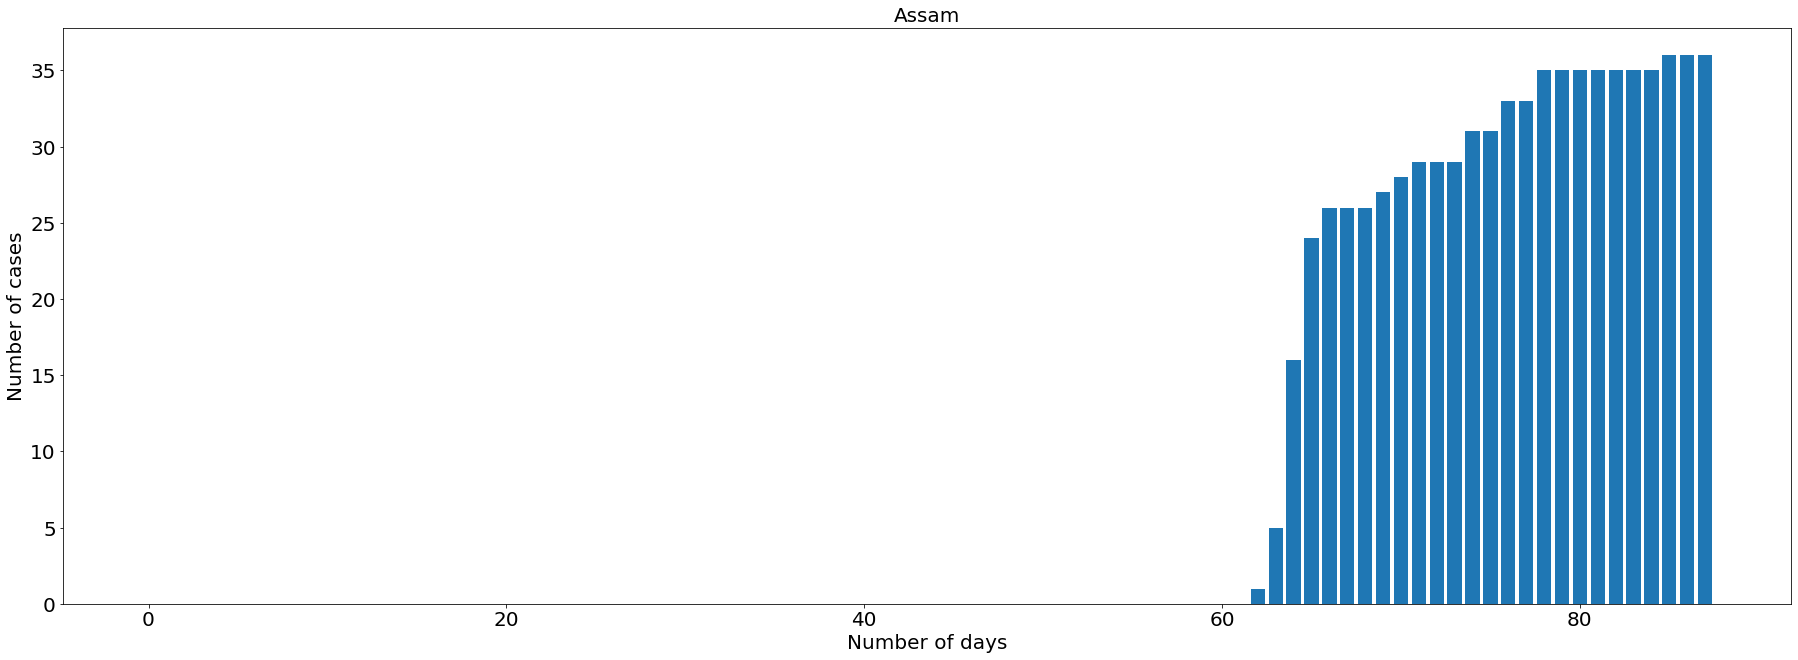

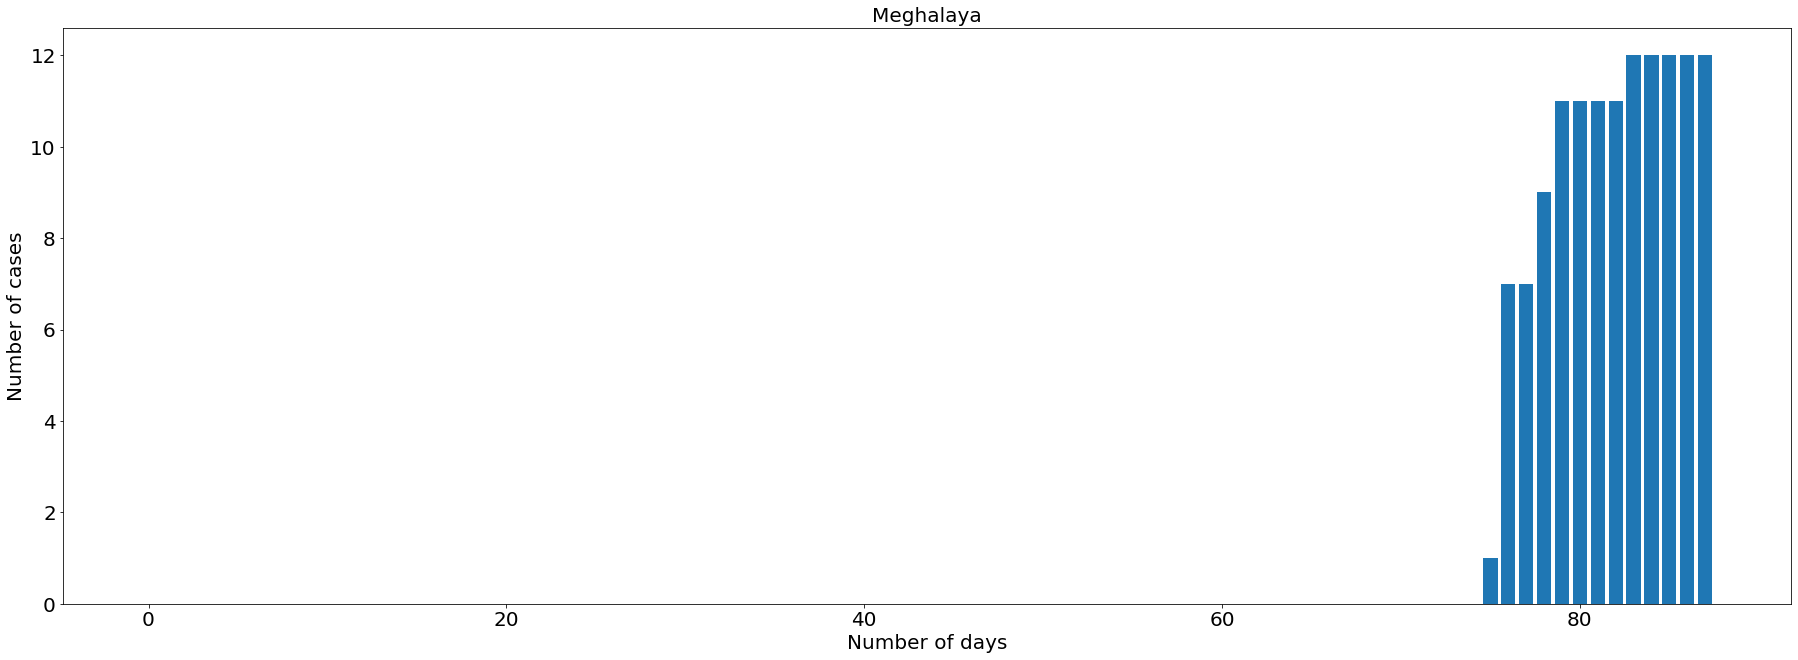

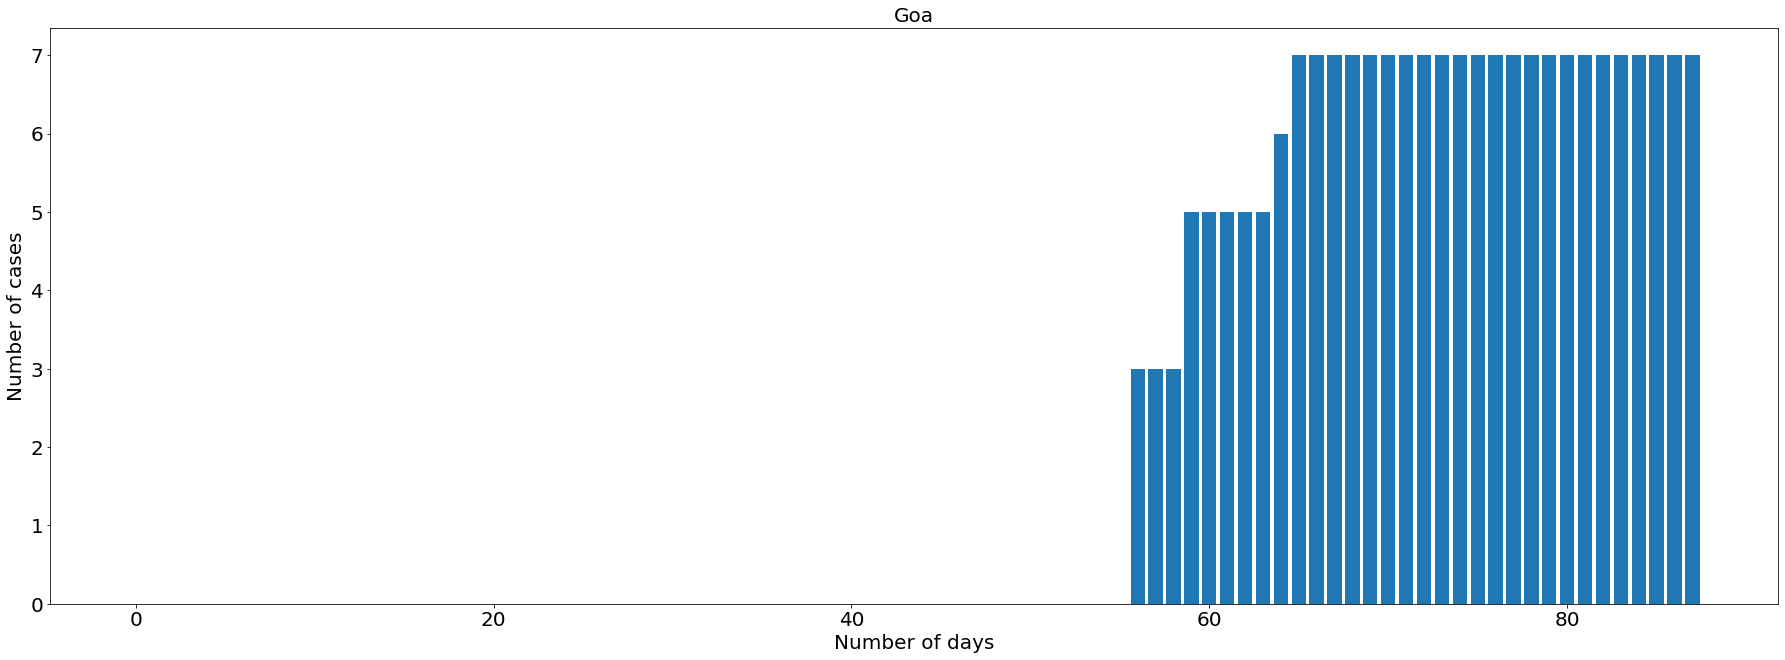

In [59]:
import matplotlib.pyplot as plt
for key,value in state_confirmed_dict.items():
  fig = plt.figure()
  ax = fig.add_axes([0,0, 4, 2])
  # plt.ylim(0, 8000)
  days = [x for x in range(len(unique_dates))]
  cases = [i for i in state_confirmed_dict[key]]
  ax.bar(days,cases)
  ax.tick_params(labelsize=20)
  plt.title(key, fontsize = 20)
  plt.xlabel('Number of days', fontsize = 20)
  plt.ylabel('Number of cases', fontsize = 20)
  plt.show()

# Taking into account the population of every state and storing them in a dictionary, which we will use to predict the states which may be having emergency conditions

In [60]:
population_data = pd.read_csv('/content/drive/My Drive/Software_Engineering_Project/covid19-in-india/population_india_census2011.csv')
population_data

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931
5,6,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996
6,7,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928
7,8,Karnataka,61095297,37469335,23625962,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),973
8,9,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919
9,10,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993


In [0]:
population_data = population_data[['State / Union Territory', 'Population']]
state_uts1 = []
for index,row in population_data.iterrows():
  state_ut1 = row['State / Union Territory']
  state_ut1 = re.sub('[^A-Za-z0-9]+', '', state_ut1)
  state_uts1.append(state_ut1)

population = population_data['Population']
population_data = population_data.drop(['State / Union Territory', 'Population'], axis=1)
population_data['State/UnionTerritory'] = state_uts1
population_data['Population'] = population

statewise_population = {}
for index, row in population_data.iterrows():
  statewise_population[row['State/UnionTerritory']] = row['Population']

# statewise_population

# Testing predictions of one state (Kerala here) for the next 5 days.
## Model used : Linear Regression

In [62]:
def predict(X_train, y_train, X_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return int(round(y_pred[0]))
  
state_prediction = {}
for key, value in state_confirmed_dict.items():
  if(key == "Kerala"):
    state_prediction[key] = []
    X_state = np.array(value)
    X_state = np.trim_zeros(X_state)
    window_size = 5
    Xt = np.array([0] * (window_size + 1))

    row = 0
    while(row < (X_state.shape[0] - window_size)):
      temp = X_state[row:row+window_size+1].tolist()
      temp = [float(item) for item in temp]
      Xt = np.vstack((Xt,temp)) 
      row = row + 1

    Xt = Xt[1:,:]
    X_train = Xt[:,0:window_size]
    y_train = Xt[:,window_size]

    number_of_days = 5
    test = value[len(value) - number_of_days-1 : ]
    for i in range(number_of_days):
      test = test[1:]
      test1 = np.array(test)
      test1 = test1.reshape((1,-1))
      prediction = predict(X_train, y_train, test1)
      test.append(prediction)
      state_prediction[key].append(prediction)

print(state_prediction)

{'Kerala': [465, 469, 475, 481, 485]}


### So, the number of cases being predicted for Kerala for the next 5 days are 465, 469, 475, 481 and 485 respectively.

# Predicting values for all states using LinearRegression

In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

def predict(X_train, y_train, X_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return int(round(y_pred[0]))



state_prediction = {}
for key, value in state_confirmed_dict.items():
  state_prediction[key] = []
  X_state = np.array(value)
  X_state = np.trim_zeros(X_state)
  window_size = 5
  Xt = np.array([0] * (window_size + 1))

  row = 0
  while(row < (X_state.shape[0] - window_size)):
    temp = X_state[row:row+window_size+1].tolist()
    temp = [float(item) for item in temp]
    Xt = np.vstack((Xt,temp)) 
    row = row + 1

  Xt = Xt[1:,:]
  X_train = Xt[:,0:window_size]
  y_train = Xt[:,window_size]

  number_of_days = 5
  test = value[len(value) - number_of_days-1 : ]
  for i in range(number_of_days):
    test = test[1:]
    test1 = np.array(test)
    test1 = test1.reshape((1,-1))
    prediction = predict(X_train, y_train, test1)
    test.append(prediction)
    state_prediction[key].append(prediction)

for key, value in state_prediction.items():
  print(key, value)

Haryana [298, 307, 321, 330, 341]
WestBengal [672, 748, 815, 890, 983]
Delhi [2770, 2920, 3082, 3248, 3425]
Uttarakhand [52, 54, 56, 58, 60]
Chhattisgarh [38, 39, 40, 41, 42]
Gujarat [3420, 3817, 4298, 4846, 5439]
Odisha [108, 115, 120, 126, 132]
JammuandKashmir [528, 561, 593, 631, 669]
Jharkhand [70, 74, 80, 86, 93]
Tripura [2, 2, 2, 2, 2]
TamilNadu [1885, 1953, 2021, 2089, 2159]
UttarPradesh [1973, 2151, 2316, 2487, 2686]
MadhyaPradesh [2230, 2372, 2514, 2664, 2818]
AndamanandNicobarIslands [41, 52, 67, 87, 114]
HimachalPradesh [40, 40, 40, 40, 40]
Maharashtra [8265, 9230, 10071, 11174, 12226]
Chandigarh [31, 32, 33, 33, 33]
Punjab [318, 325, 341, 351, 367]
Telengana [1000, 1001, 1012, 1019, 1027]
Mizoram [1, 1, 1, 1, 1]
Bihar [301, 346, 416, 480, 569]
ArunachalPradesh [1, 1, 1, 1, 1]
Kerala [465, 469, 475, 481, 485]
Manipur [2, 2, 2, 2, 2]
Ladakh [20, 20, 20, 20, 20]
Rajasthan [2154, 2224, 2302, 2392, 2484]
Karnataka [522, 546, 571, 594, 619]
AndhraPradesh [1191, 1273, 1356, 1456, 

# Predicting the states which may be having potential emergency situations in the next 5 days. We have done this by fixing a threshold value of the ratio of the number of cases in the state to it's population.

In [64]:
threshold = 0.0001
emergency_states = []
for key, value in state_prediction.items():
  ratio = []
  for i in value:
    ratio.append(i/statewise_population[key])
  for i in ratio:
    if(i >= threshold):
      emergency_states.append(key)
    
emergency_states = set(emergency_states)
print(emergency_states)

{'AndamanandNicobarIslands', 'Maharashtra', 'Delhi'}


### Thus, we have predicted that Delhi, Maharashtra and Andaman may be in potential emergency situations as a large ratio of their population will be affected in the next few days.

In [65]:
threshold = 0.00001
emergency_states = []
for key, value in state_prediction.items():
  ratio = []
  for i in value:
    ratio.append(i/statewise_population[key])
  for i in ratio:
    if(i >= threshold):
      emergency_states.append(key)
    
emergency_states = set(emergency_states)
print(emergency_states)

{'Maharashtra', 'Chandigarh', 'Kerala', 'TamilNadu', 'Haryana', 'Ladakh', 'WestBengal', 'UttarPradesh', 'Rajasthan', 'Delhi', 'Punjab', 'Telengana', 'Karnataka', 'MadhyaPradesh', 'AndamanandNicobarIslands', 'AndhraPradesh', 'Gujarat', 'JammuandKashmir'}


### Using a more strict threshold value, we see that the conditions in more number of states are predicted as emergency situations.

# Predictions made using other models

## Multi Layer Perceptron (MLP) model 1

In [0]:
def predict_mlp1(X_train, y_train, X_test):
  model_nn = Sequential()
  model_nn.add(Dense(100, input_dim=window_size, activation='relu'))
  model_nn.add(Dense(1))
  model_nn.compile(optimizer='adam', loss='mse', metrics=['mse'])
  model_nn.fit(X_train, y_train, epochs=50, verbose=0)
  y_pred = model_nn.predict(X_test)
  return y_pred[0][0]

In [67]:
state_prediction = {}
for key, value in state_confirmed_dict.items():
  state_prediction[key] = []
  X_state = np.array(value)
  X_state = np.trim_zeros(X_state)
  window_size = 5
  Xt = np.array([0] * (window_size + 1))

  row = 0
  while(row < (X_state.shape[0] - window_size)):
    temp = X_state[row:row+window_size+1].tolist()
    temp = [float(item) for item in temp]
    Xt = np.vstack((Xt,temp)) 
    row = row + 1

  Xt = Xt[1:,:]
  X_train = Xt[:,0:window_size]
  y_train = Xt[:,window_size]

  number_of_days = 5
  test = value[len(value) - number_of_days-1 : ]
  for i in range(number_of_days):
    test = test[1:]
    test1 = np.array(test)
    test1 = test1.reshape((1,-1))
    test1 = test1.astype(float)
    prediction = predict_mlp1(X_train, y_train, test1)
    test.append(int(round(prediction)))
    state_prediction[key].append(int(round(prediction)))


for key, value in state_prediction.items():
  print(key, value)

Haryana [302, 316, 328, 346, 357]
WestBengal [689, 765, 837, 922, 1019]
Delhi [2829, 2994, 3203, 3390, 3626]
Uttarakhand [51, 54, 56, 57, 60]
Chhattisgarh [40, 39, 41, 41, 43]
Gujarat [3605, 3863, 4233, 5056, 5678]
Odisha [107, 114, 120, 129, 137]
JammuandKashmir [515, 549, 583, 619, 662]
Jharkhand [76, 80, 87, 103, 116]
Tripura [2, 2, 2, 2, 2]
TamilNadu [1945, 2055, 2141, 2271, 2361]
UttarPradesh [2081, 2290, 2518, 2767, 2987]
MadhyaPradesh [2428, 2603, 2842, 3136, 3305]
AndamanandNicobarIslands [30, 25, 37, 39, 44]
HimachalPradesh [48, 45, 44, 46, 50]
Maharashtra [8644, 9378, 10521, 11587, 12807]
Chandigarh [31, 32, 33, 33, 34]
Punjab [334, 354, 371, 393, 410]
Telengana [1071, 1144, 1189, 1243, 1303]
Mizoram [1, 1, 1, 1, 1]
Bihar [269, 323, 360, 437, 500]
ArunachalPradesh [1, 1, 1, 1, 1]
Kerala [476, 489, 502, 516, 531]
Manipur [2, 2, 2, 2, 2]
Ladakh [20, 21, 21, 22, 22]
Rajasthan [2244, 2381, 2625, 2815, 3000]
Karnataka [546, 567, 600, 641, 672]
AndhraPradesh [1208, 1302, 1414, 1525

## We see that we get much larger prediction of cases in all the states using MLP. The states having emergency conditions though, remain the dame as it's ratio with population is not much affected.

In [68]:
threshold = 0.0001
emergency_states = []
for key, value in state_prediction.items():
  ratio = []
  for i in value:
    ratio.append(i/statewise_population[key])
  for i in ratio:
    if(i >= threshold):
      emergency_states.append(key)
    
emergency_states = set(emergency_states)
print(emergency_states)

{'AndamanandNicobarIslands', 'Maharashtra', 'Delhi'}


# MLP model 2

In [0]:
def predict_mlp2(X_train, y_train, X_test):
  model_nn = Sequential()
  model_nn.add(Dense(90, input_dim=window_size, activation='relu'))
  model_nn.add(Dense(30, activation='relu'))
  model_nn.add(Dense(1))
  model_nn.compile(optimizer='adam', loss='mse', metrics=['mse'])
  model_nn.fit(X_train, y_train, epochs=50, verbose=0)
  y_pred = model_nn.predict(X_test)
  return y_pred[0][0]

In [70]:
state_prediction = {}
for key, value in state_confirmed_dict.items():
  state_prediction[key] = []
  X_state = np.array(value)
  X_state = np.trim_zeros(X_state)
  window_size = 5
  Xt = np.array([0] * (window_size + 1))

  row = 0
  while(row < (X_state.shape[0] - window_size)):
    temp = X_state[row:row+window_size+1].tolist()
    temp = [float(item) for item in temp]
    Xt = np.vstack((Xt,temp)) 
    row = row + 1

  Xt = Xt[1:,:]
  X_train = Xt[:,0:window_size]
  y_train = Xt[:,window_size]

  number_of_days = 5
  test = value[len(value) - number_of_days-1 : ]
  for i in range(number_of_days):
    test = test[1:]
    test1 = np.array(test)
    test1 = test1.reshape((1,-1))
    test1 = test1.astype(float)
    prediction = predict_mlp2(X_train, y_train, test1)
    test.append(prediction)
    state_prediction[key].append(int(round(prediction)))

for key, value in state_prediction.items():
  print(key, value)

Haryana [300, 309, 320, 329, 341]
WestBengal [695, 759, 847, 917, 1021]
Delhi [2860, 3019, 3212, 3405, 3645]
Uttarakhand [52, 54, 56, 57, 59]
Chhattisgarh [39, 40, 40, 40, 43]
Gujarat [3564, 4046, 4455, 4809, 5352]
Odisha [108, 112, 120, 127, 132]
JammuandKashmir [516, 551, 582, 624, 665]
Jharkhand [72, 76, 86, 101, 107]
Tripura [2, 2, 2, 2, 2]
TamilNadu [1929, 2026, 2099, 2213, 2299]
UttarPradesh [2069, 2280, 2493, 2716, 2944]
MadhyaPradesh [2210, 2683, 2685, 2965, 3266]
AndamanandNicobarIslands [30, 33, 38, 44, 45]
HimachalPradesh [43, 49, 45, 52, 51]
Maharashtra [8557, 9430, 10477, 11643, 12880]
Chandigarh [31, 32, 33, 33, 35]
Punjab [320, 338, 359, 380, 401]
Telengana [1096, 1089, 1173, 1232, 1276]
Mizoram [1, 1, 1, 1, 1]
Bihar [282, 331, 368, 404, 468]
ArunachalPradesh [1, 1, 1, 1, 1]
Kerala [470, 487, 494, 502, 517]
Manipur [2, 2, 2, 2, 2]
Ladakh [21, 21, 21, 21, 22]
Rajasthan [2226, 2547, 2631, 2864, 3057]
Karnataka [546, 574, 608, 644, 679]
AndhraPradesh [1217, 1308, 1408, 1524

## In this case, we see that we get much prediction of number of cases similar to what we got using Linear Regression.

In [71]:
threshold = 0.0001
emergency_states = []
for key, value in state_prediction.items():
  ratio = []
  for i in value:
    ratio.append(i/statewise_population[key])
  for i in ratio:
    if(i >= threshold):
      emergency_states.append(key)
    
emergency_states = set(emergency_states)
print(emergency_states)

{'AndamanandNicobarIslands', 'Maharashtra', 'Delhi'}


# Augmenting data with more rows, by taking 'time' into account.

In [0]:
state_dict = {}
for key, values in final.items():
  new_list = []
  confirmed_list = values['Confirmed'].tolist()
  differences = [t - s for s, t in zip(confirmed_list, confirmed_list[1:])]
  differences = [(x/5) for x in differences]
  count = 0
  for i in range(len(confirmed_list)-1):
    temp = confirmed_list[i]
    new_list.append(temp)
    for j in range(5):
      temp = temp + differences[i]
      new_list.append(round(temp))
  state_dict [key] = new_list


In [0]:
def predict_lr_augmented(X_train, y_train, X_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return int(round(y_pred[0]))

In [74]:
state_prediction = {}
for key, value in state_dict.items():
  state_prediction[key] = []
  X_state = np.array(value)
  X_state = np.trim_zeros(X_state)
  window_size = 5
  Xt = np.array([0] * (window_size + 1))

  row = 0
  while(row < (X_state.shape[0] - window_size)):
    temp = X_state[row:row+window_size+1].tolist()
    temp = [float(item) for item in temp]
    Xt = np.vstack((Xt,temp)) 
    row = row + 1

  Xt = Xt[1:,:]
  X_train = Xt[:,0:window_size]
  y_train = Xt[:,window_size]

  number_of_days = 5
  test = value[len(value) - number_of_days-1 : ]
  for i in range(number_of_days):
    test = test[1:]
    test1 = np.array(test)
    test1 = test1.reshape((1,-1))
    prediction = predict_lr_augmented(X_train, y_train, test1)
    test.append(prediction)
    state_prediction[key].append(prediction)

for key, value in state_prediction.items():
  print(key, value)

Haryana [292, 295, 298, 301, 304]
WestBengal [620, 630, 640, 650, 660]
Delhi [2648, 2672, 2697, 2722, 2748]
Uttarakhand [51, 51, 52, 52, 53]
Chhattisgarh [37, 37, 37, 37, 37]
Gujarat [3123, 3175, 3228, 3282, 3336]
Odisha [105, 107, 109, 111, 113]
JammuandKashmir [501, 507, 513, 519, 525]
Jharkhand [68, 69, 70, 71, 72]
Tripura [2, 2, 2, 2, 2]
TamilNadu [1834, 1847, 1860, 1873, 1886]
UttarPradesh [1862, 1883, 1906, 1930, 1955]
MadhyaPradesh [2124, 2151, 2178, 2205, 2232]
AndamanandNicobarIslands [34, 35, 36, 37, 38]
HimachalPradesh [40, 40, 40, 40, 40]
Maharashtra [7762, 7892, 8021, 8151, 8286]
Chandigarh [30, 30, 30, 30, 30]
Punjab [299, 301, 303, 306, 309]
Telengana [994, 998, 1003, 1008, 1013]
Mizoram [1, 1, 1, 1, 1]
Bihar [256, 262, 268, 274, 280]
ArunachalPradesh [1, 1, 1, 1, 1]
Kerala [459, 460, 461, 462, 463]
Manipur [2, 2, 2, 2, 2]
Ladakh [20, 20, 20, 20, 20]
Rajasthan [2097, 2113, 2131, 2150, 2170]
Karnataka [504, 507, 511, 515, 519]
AndhraPradesh [1107, 1119, 1132, 1146, 1160]


# As the data was divided and augmented, we see a much more steady rate in the different time frames of the day. Thus, our algorithm predicts only Delhi to be in a potential emergency condition by the next day.

In [75]:
threshold = 0.0001
emergency_states = []
for key, value in state_prediction.items():
  ratio = []
  for i in value:
    ratio.append(i/statewise_population[key])
  for i in ratio:
    if(i >= threshold):
      emergency_states.append(key)
    
emergency_states = set(emergency_states)
print(emergency_states)

{'Delhi'}


# Training using world data
## In this section, we train our models using data for other countries (USA here), and predict it for the outcomes of Indian states.

In [76]:
world_data = pd.read_csv('/content/drive/My Drive/Software_Engineering_Project/worldwide-covid-data.csv')
world_data

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.000,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.000,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,ZWE,Zimbabwe,2020-04-18,24,0,3,0,1.615,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12447,ZWE,Zimbabwe,2020-04-19,25,1,3,0,1.682,0.067,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12448,ZWE,Zimbabwe,2020-04-20,25,0,3,0,1.682,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12449,ZWE,Zimbabwe,2020-04-21,25,0,3,0,1.682,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN


In [77]:
US_d = world_data[world_data['iso_code']=='USA']
us_data = pd.DataFrame()
us_data['Date'] = US_d['date']
us_data['Confirmed'] = US_d['total_cases']
us_data

,Date,Confirmed
11884,2019-12-31,0
11885,2020-01-01,0
11886,2020-01-02,0
11887,2020-01-03,0
11888,2020-01-04,0
...,...,...
11993,2020-04-18,702164
11994,2020-04-19,735086
11995,2020-04-20,759687
11996,2020-04-21,787752


In [0]:
X = us_data['Confirmed'].to_numpy()
X = np.trim_zeros(X)

In [0]:
window_size = len(state_confirmed_dict['Kerala'])
X2 = np.array([0] * (window_size + 1))

row = 0
while(row < (X.shape[0] - window_size)):
  temp = X[row:row+window_size+1].tolist()
  temp = [float(item) for item in temp]
  X2 = np.vstack((X2,temp)) 
  row = row + 1

X2 = X2[1:,:]

In [0]:
X_train = X2[:,0:window_size]
y_train = X2[:,window_size]

In [81]:
model_world_data = LinearRegression()
model_world_data.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
state_predictions = {}
for key, value in state_confirmed_dict.items():
  X_test = np.array(value)
  X_test = X_test.reshape((1,-1))
  prediction = model_world_data.predict(X_test)
  state_predictions[key] = int(round(prediction[0]))

for key, value in state_predictions.items():
  print(key, value)

Haryana 362855
WestBengal 362868
Delhi 364070
Uttarakhand 362690
Chhattisgarh 362680
Gujarat 363667
Odisha 362705
JammuandKashmir 362920
Jharkhand 362673
Tripura 362650
TamilNadu 363835
UttarPradesh 363411
MadhyaPradesh 363492
AndamanandNicobarIslands 362664
HimachalPradesh 362681
Maharashtra 365252
Chandigarh 362677
Punjab 362838
Telengana 363336
Mizoram 362650
Bihar 362715
ArunachalPradesh 362650
Kerala 363102
Manipur 362651
Ladakh 362670
Rajasthan 363642
Karnataka 362963
AndhraPradesh 363148
Puducherry 362656
Assam 362682
Meghalaya 362654
Goa 362658


## We see that the number of cases predicted is much more on training it with data for USA. This is because, the rate of increase of cases is much more than almost every state of India. Thus even on putting a much more strict threshold, we see that many states are predicted as going into possible emergency situations by the next day. 

In [83]:
threshold = 0.1
emergency_states = []
for key, value in state_predictions.items():
  ratio = value/statewise_population[key]
  if(ratio >= threshold and ratio<1):
    emergency_states.append(key)
    
emergency_states = set(emergency_states)
print(emergency_states)

{'Mizoram', 'Chandigarh', 'Manipur', 'Puducherry', 'AndamanandNicobarIslands', 'Goa', 'Meghalaya', 'ArunachalPradesh'}


## From the above models, we choose the linear regression model trained on data for Indian states as our final model. This is because, it also gave fairly good results on checking it on train-validation data split.

# Final model

In [0]:
class covid_predictions:

  def __init__(self, window_size = 5, number_of_days = 5, threshold = 0.0001):
    self.model = LinearRegression()
    self.window_size = window_size
    self.number_of_days = number_of_days
    self.threshold = threshold

  def set_data(self, data):
    self.data = data

  def fit_model(self, X_train, y_train):
    self.model.fit(X_train, y_train)

  def clean_population_data(self, population_data):
    population_data = population_data[['State / Union Territory', 'Population']]
    state_uts1 = []
    for index,row in population_data.iterrows():
      state_ut1 = row['State / Union Territory']
      state_ut1 = re.sub('[^A-Za-z0-9]+', '', state_ut1)
      state_uts1.append(state_ut1)

    population = population_data['Population']
    population_data = population_data.drop(['State / Union Territory', 'Population'], axis=1)
    population_data['State/UnionTerritory'] = state_uts1
    population_data['Population'] = population

    return population_data

  def calculate_statewise_population(self, population_data):
    statewise_population = {}
    for index, row in population_data.iterrows():
      statewise_population[row['State/UnionTerritory']] = row['Population']

    return statewise_population

  def get_state_population(self):
    population_data = pd.read_csv('/content/drive/My Drive/Software_Engineering_Project/covid19-in-india/population_india_census2011.csv')
    population_data = self.clean_population_data(population_data)
    statewise_population = self.calculate_statewise_population(population_data)

    return statewise_population

  def make_model_prediction(self, value):
    test = value[len(value) - self.number_of_days-1 : ]
    predicted = []
    for i in range(self.number_of_days):
      test = test[1:]
      test1 = np.array(test)
      test1 = test1.reshape((1,-1))
      prediction = self.model.predict(test1)
      test.append(int(round(prediction[0])))
      predicted.append(int(round(prediction[0])))
    
    return predicted

  def remove_special_characters(self, data):
    state_uts = []
    for index,row in data.iterrows():
      state_ut = row['State/UnionTerritory']
      state_ut = re.sub('[^A-Za-z0-9]+', '', state_ut)
      state_uts.append(state_ut)
    return state_uts

  def create_dates_dataframe(self, unique_dates):
    df1 = pd.DataFrame(columns = ['Date', 'Confirmed'])
    df1['Date'] = unique_dates
    df1['Confirmed'] = 0
    return df1

  def get_statewise_confirmed_cases(self, unique_dates, unique_states):
    df1 = self.create_dates_dataframe(unique_dates)

    final = {}
    for state in unique_states:
      dates = []
      confirmeds = []
      df2 = pd.DataFrame()
      for index, row in df1.iterrows():
        datevalue = row['Date']
        dates.append(datevalue)
        a = self.data[(self.data['State/UnionTerritory']==state) & (self.data['Date']==datevalue)]
        if(a.empty):
          confirmeds.append(0)
        else:
          conf = (a['Confirmed'].values[0])
          confirmeds.append(conf)
      df2 = pd.DataFrame()
      df2['Date'] = dates
      df2['Confirmed'] = confirmeds
      final[state] = df2

    return final

  def remove_states_with_no_cases(self, state_cases):
    delete = []
    for key, value in state_cases.items():
      confirmed_list = value['Confirmed'].tolist()
      length = len(confirmed_list)
      if(confirmed_list[length-1] == 0):
        delete.append(key)

    for i in delete:
      del state_cases[i]

    return state_cases

  def get_statewise_cases(self, state_cases):
    state_confirmed_dict = {}
    for key, values in state_cases.items():
      confirmed_list = values['Confirmed'].tolist()
      state_confirmed_dict[key] = confirmed_list

    return state_confirmed_dict

  def fit_train(self, X_state):
    X_state = np.trim_zeros(X_state)
    Xt = np.array([0] * (self.window_size + 1))
    row = 0
    while(row < (X_state.shape[0] - self.window_size)):
      temp = X_state[row:row+self.window_size+1].tolist()
      temp = [float(item) for item in temp]
      Xt = np.vstack((Xt,temp)) 
      row = row + 1

    Xt = Xt[1:,:]
    X_train = Xt[:,0:self.window_size]
    y_train = Xt[:,self.window_size]

    return X_train, y_train

  def fit_test(self, X_train):
    X_test = X_train[X_train.shape[0]-1 , :]
    X_test = X_test.reshape((1,-1))
    return X_test      

  def predict(self, state_confirmed_dict):
    
    state_prediction = {}

    for key, value in state_confirmed_dict.items():
      X_state = np.array(value)
      X_train, y_train = self.fit_train(np.array(value))
      self.fit_model(X_train, y_train)
      state_prediction[key] = self.make_model_prediction(value)

    return state_prediction

  def find_emergency_states(self, state_prediction):
    emergency_states = []
    statewise_population = self.get_state_population()
    for key, value in state_prediction.items():
      ratio = []
      for i in value:
        ratio.append(i/statewise_population[key])
      for i in ratio:
        if(i >= self.threshold):
          emergency_states.append(key)
        
    emergency_states = set(emergency_states)
    return emergency_states

  def train(self, path):

    data = pd.read_csv(path)
    self.set_data(data)

    data['State/UnionTerritory'] = self.remove_special_characters(data)

    unique_dates = data['Date'].unique().tolist()
    unique_states = set(data['State/UnionTerritory'].tolist())

    state_cases = self.get_statewise_confirmed_cases(unique_dates, unique_states)
    
    state_cases = self.remove_states_with_no_cases(state_cases)

    state_confirmed_dict = self.get_statewise_cases(state_cases)

    state_prediction = self.predict(state_confirmed_dict)

    emergency_states = self.find_emergency_states(state_prediction)

    print(emergency_states)

In [85]:
covid_pred = covid_predictions()
covid_pred.train('/content/drive/My Drive/Software_Engineering_Project/covid19-in-india/covid_19_india.csv')

{'AndamanandNicobarIslands', 'Maharashtra', 'Delhi'}
